<h1 style="text-align:center;color:teal;font-family:calibri;font-size:250%">Telecom Churn Case Study</h1>

### Problem Statement 

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

### Business Goal

To recommend strategies to manage customer churn based on your observations and models built.


### Import libraries

In [280]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [281]:
#import the visualisation libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [282]:
#import the ML libraries
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_recall_curve

### Importing the Dataset

In [283]:
churn_data = pd.read_csv("telecom_churn_data.csv")
churn_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

### Inspecting the Dataframe

In [284]:
churn_data.shape # The dataset has 99999 rows and 226 columns

(99999, 226)

In [285]:
churn_data.describe() # We can look at various attributes such as mean, minimum and maximum value, 25th,50th percentile etc

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

#### Check the percent of missing values

In [286]:
round(churn_data.isnull().sum()/churn_data.shape[0]*100,2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

> Many columns have arount 74% missing values

###  Handling the missing values

> We can see that there are many columns with missing values, some of them like total_rech_data_6 indicates that recharge is not done, hence can be imputed with zero

In [287]:
#Create a list of columns where we can replace nan with 0
z_impute=['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9','max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9',
          'count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_2g_9','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','count_rech_3g_9'
         ,'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9','arpu_3g_6','arpu_3g_7','arpu_3g_8'
         ,'arpu_3g_9','arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_2g_9','night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9',
         'fb_user_6','fb_user_7','fb_user_8','fb_user_9']

In [288]:
# Fill nan values with 0
for i in z_impute:
    churn_data[i].fillna(0,inplace=True)

In [289]:
#Check for the null values
churn_data.isnull().sum()/len(churn_data)*100

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

#### Drop the columns with more than 50% null values

In [290]:
col=churn_data.columns[churn_data.isnull().sum()/len(churn_data)*100>=50]
col

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')

In [291]:
churn_data.drop(columns=list(col),axis=1,inplace=True)

In [292]:
churn_data.shape

(99999, 222)

In [293]:
# Setting the mobile number as the index of the dataset as it a unique identifier
churn_data.set_index('mobile_number',inplace=True) 

In [294]:
# List of categorical and numerical columns
list_cat=list(churn_data.select_dtypes(include=['object']).columns)
print("Categorical Columns :",list_cat , "\n\n\n")
list_num=list(churn_data.select_dtypes(include=['int64','float64']).columns)
print("Numerical Columns :",list_num)

Categorical Columns : ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9'] 



Numerical Columns : ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_m

#### Impute the missing values of numerical columns with median(since outliers are found)

In [295]:
for j in list_num:
    churn_data[j].fillna(churn_data[j].median(),inplace=True)

#### We can drop the date columns and circle id column

In [296]:
date_id=['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9','date_of_last_rech_6',
     'date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9','circle_id']
churn_data.drop(columns=date_id,inplace=True)

In [297]:
#Check for the null values
churn_data.isnull().sum()/len(churn_data)*100

loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_t2c_m

### EDA on the dataset

#### Univarient Analysis

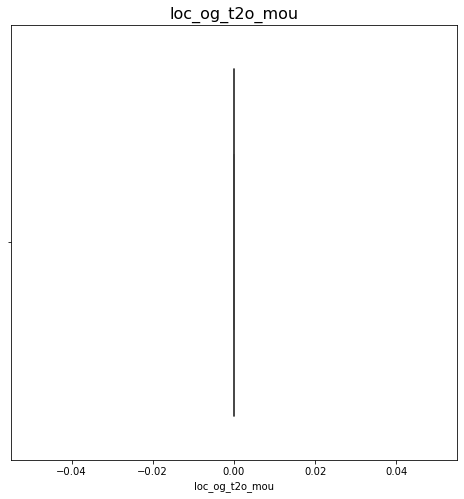

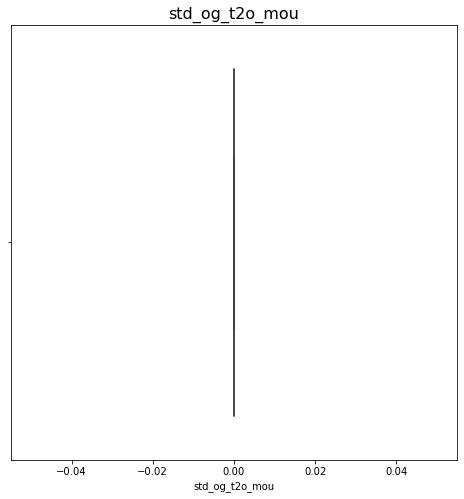

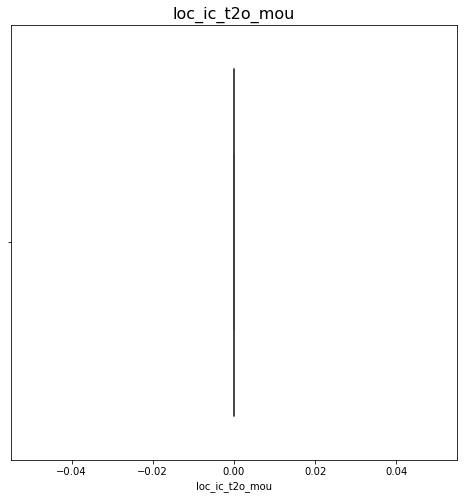

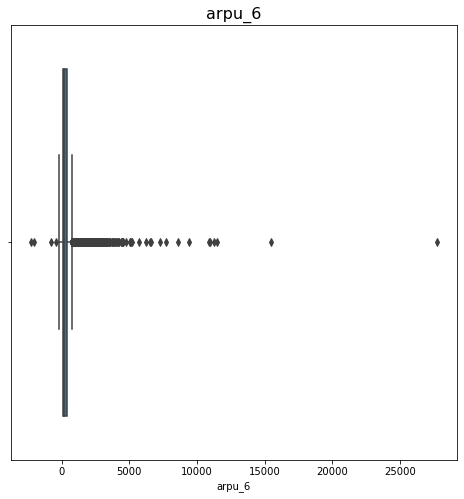

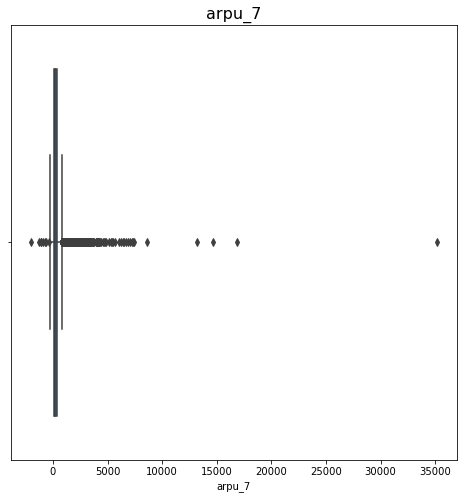

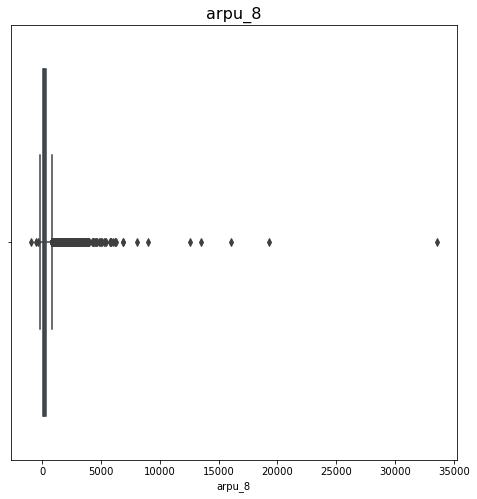

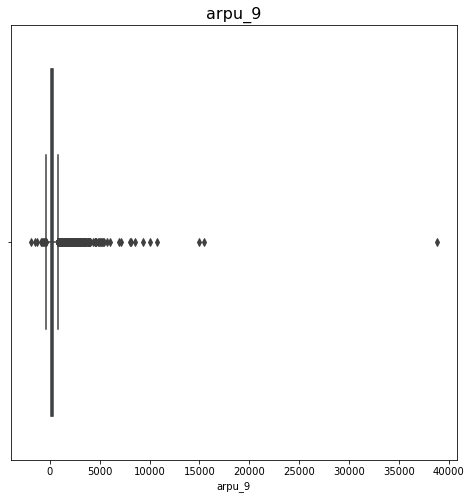

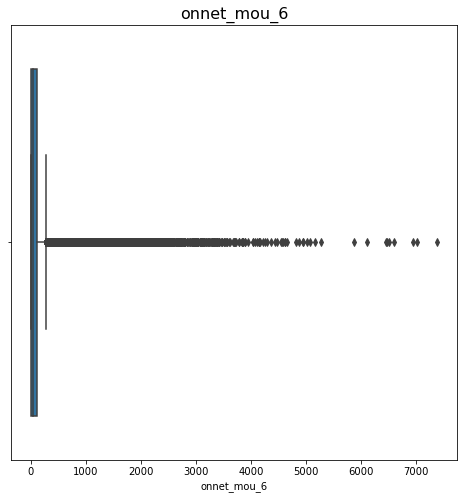

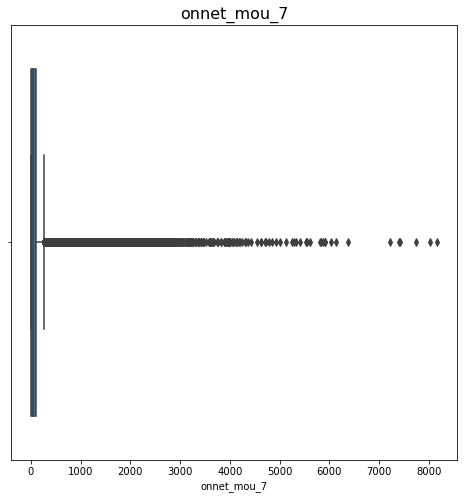

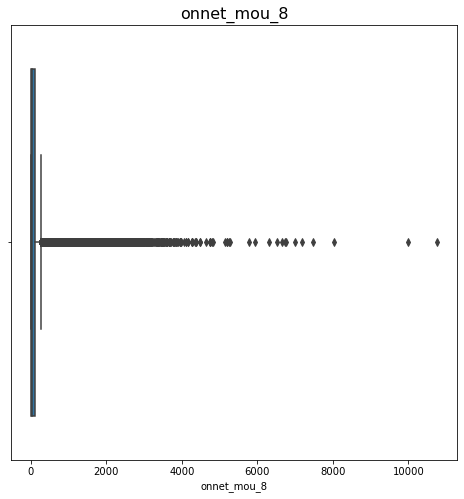

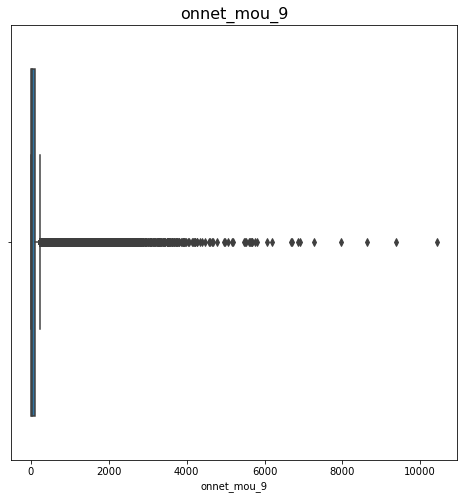

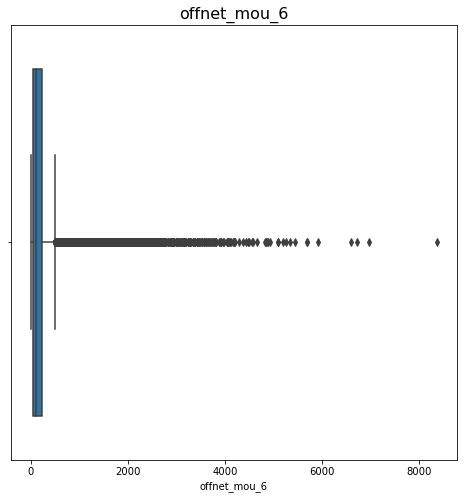

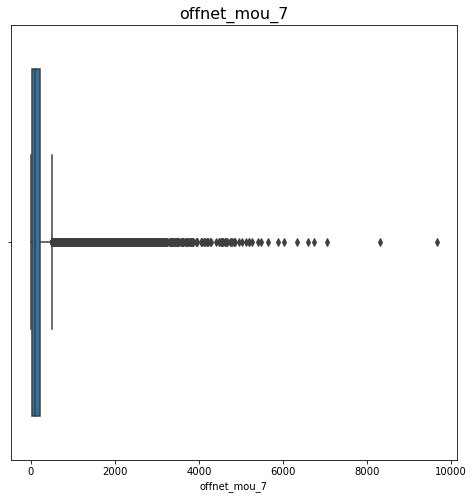

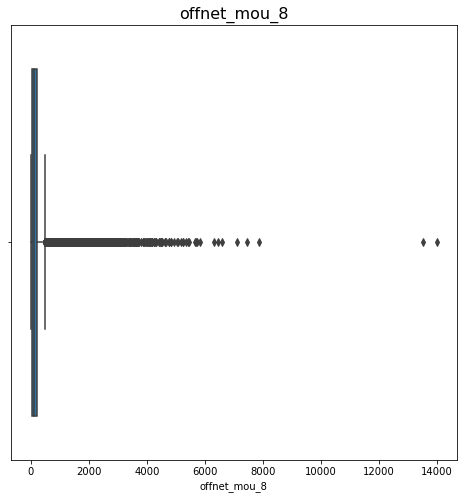

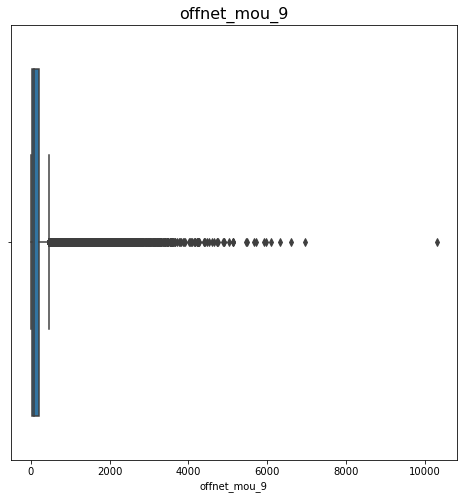

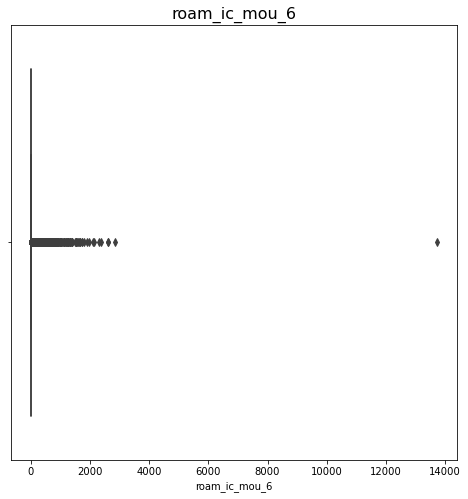

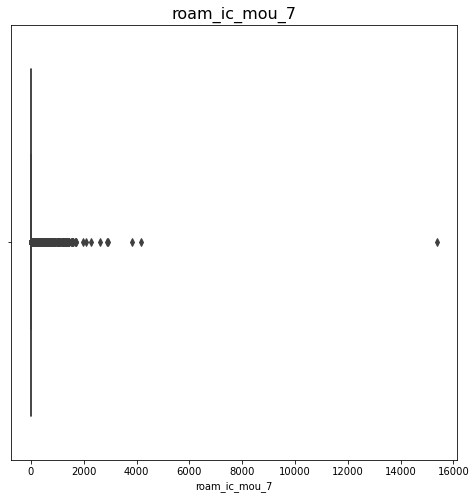

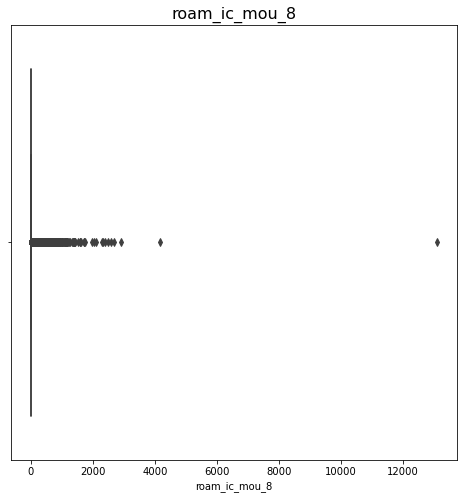

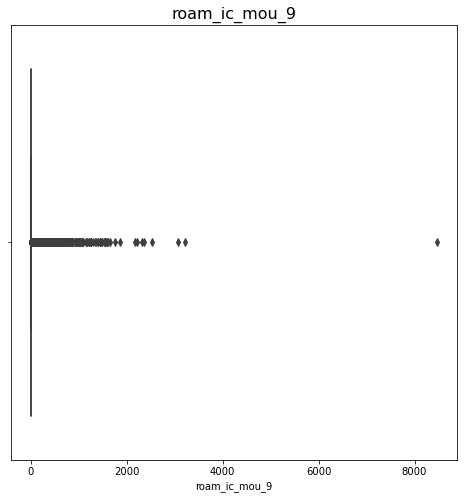

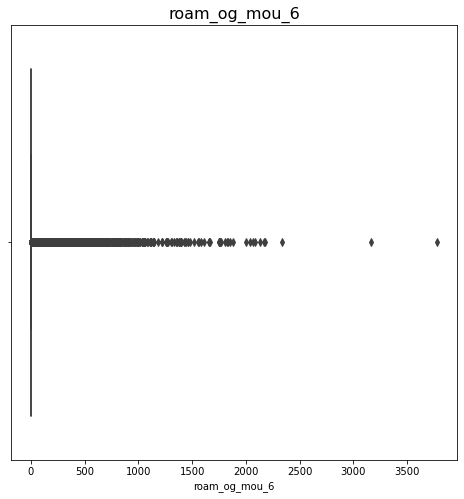

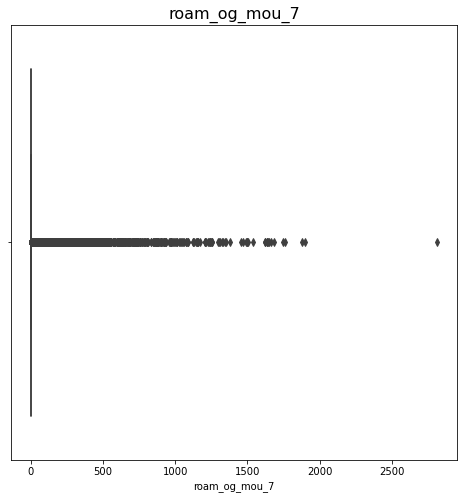

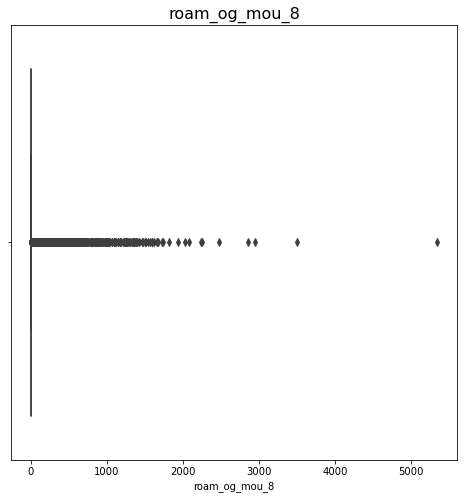

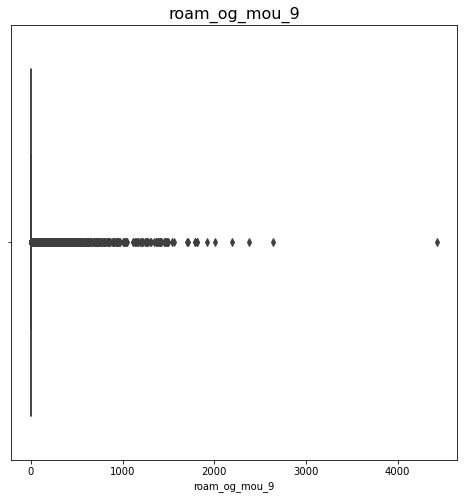

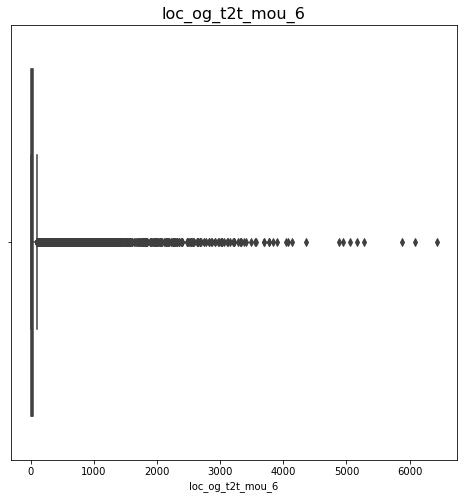

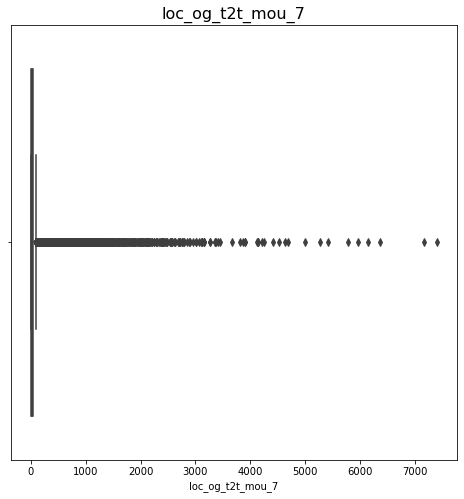

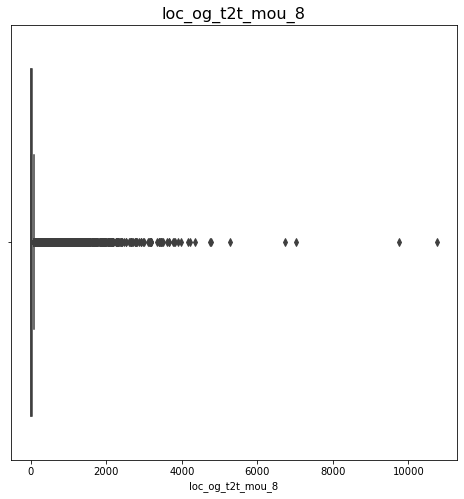

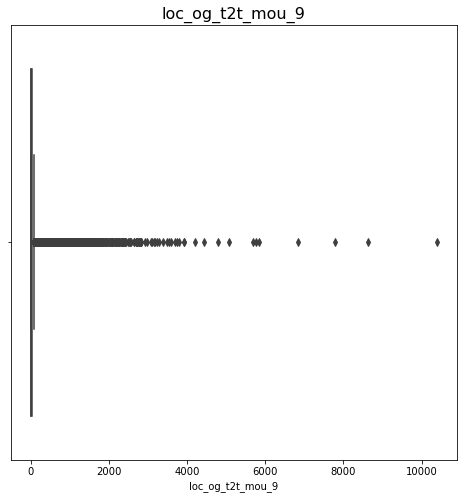

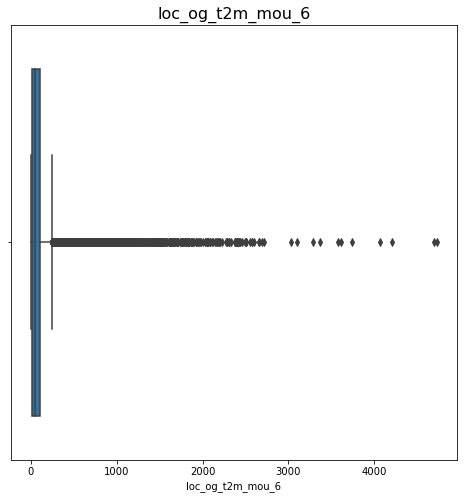

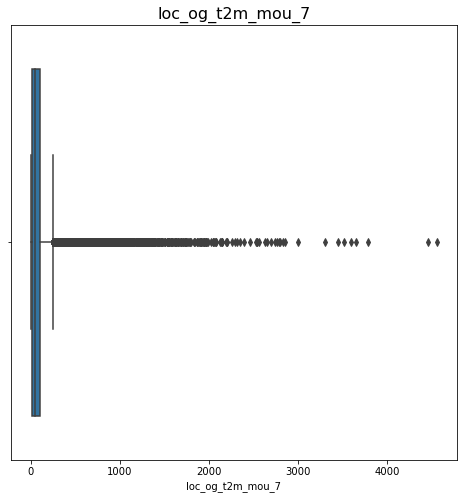

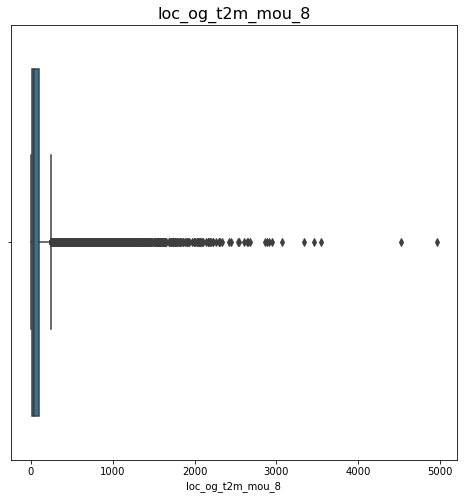

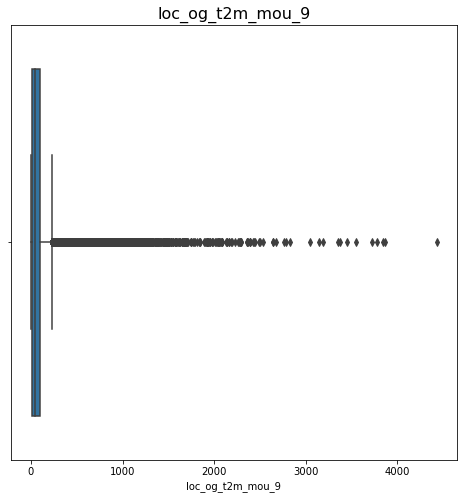

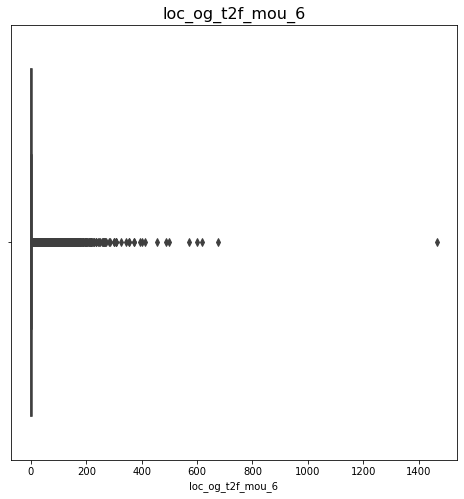

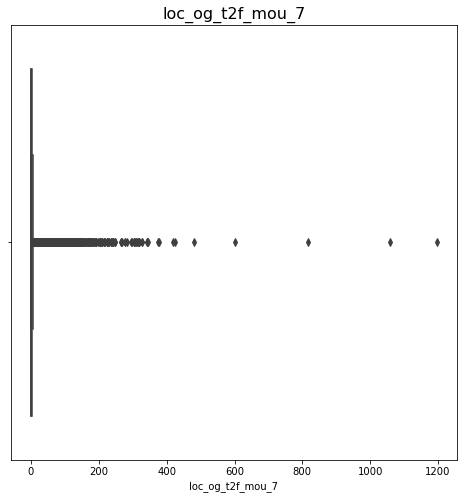

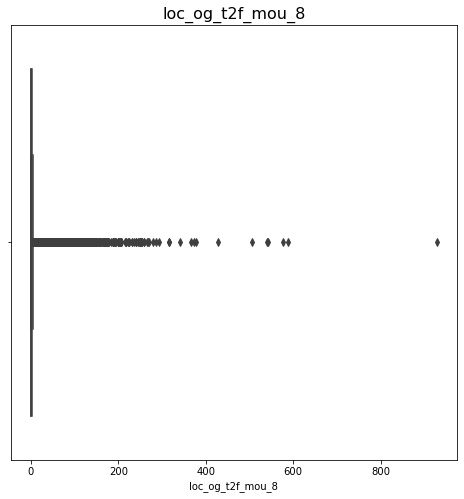

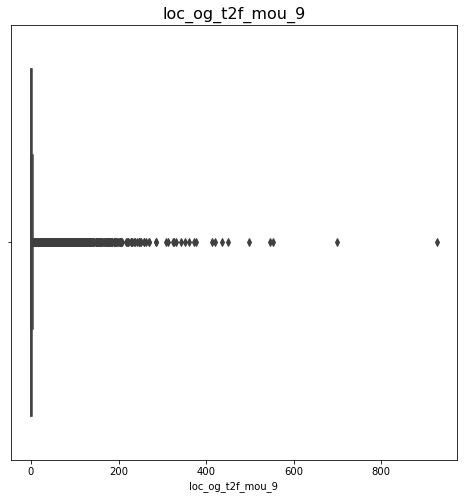

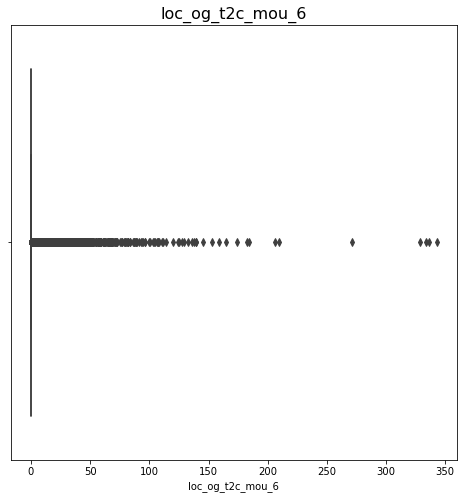

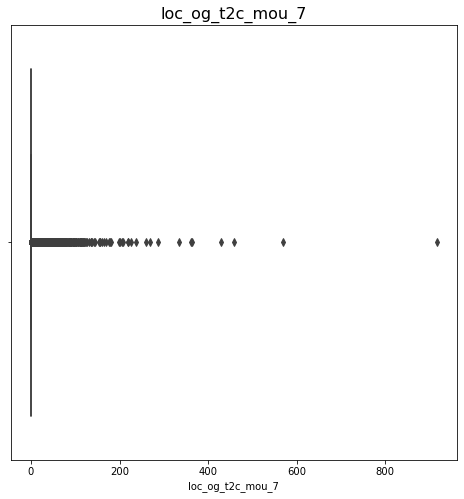

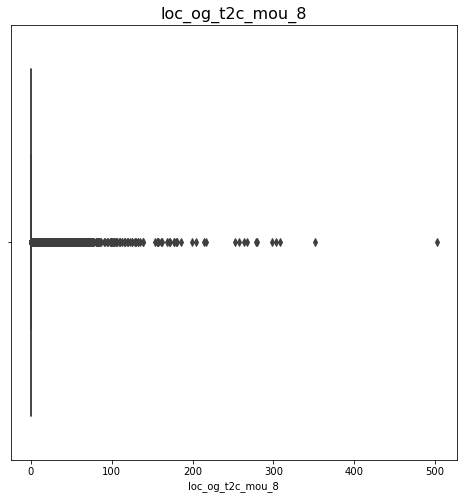

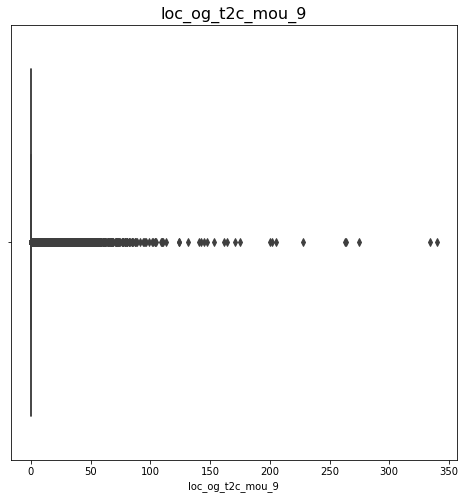

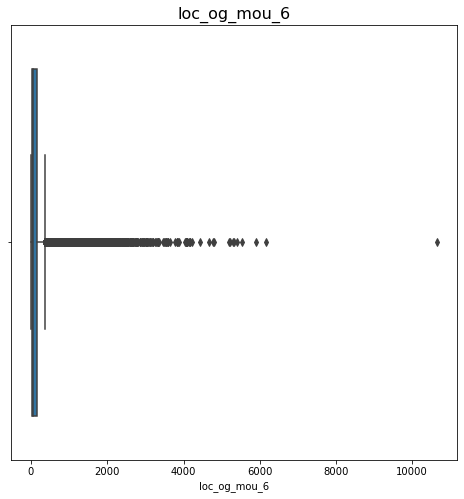

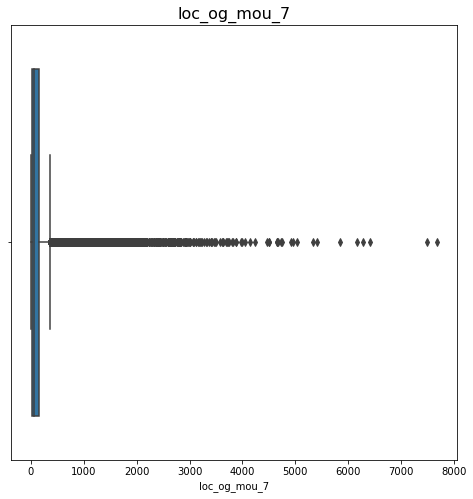

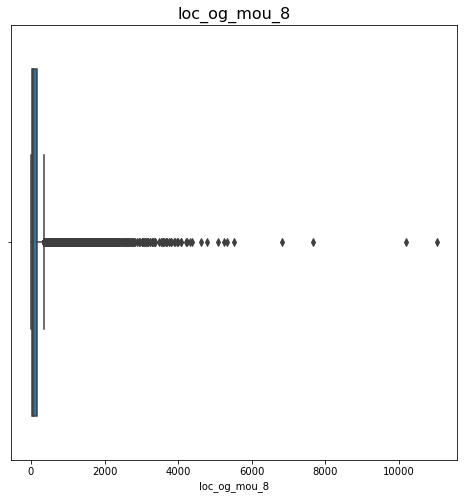

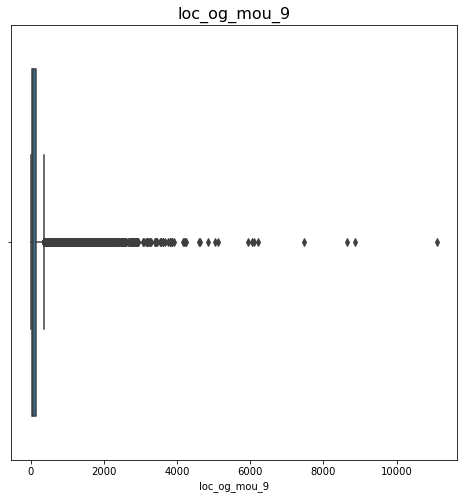

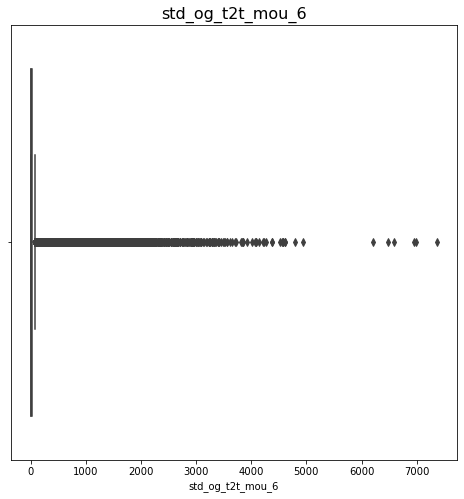

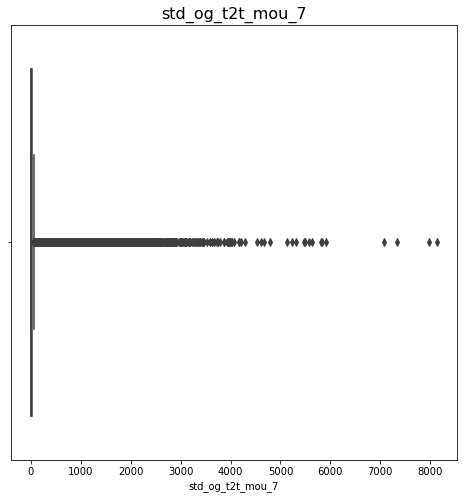

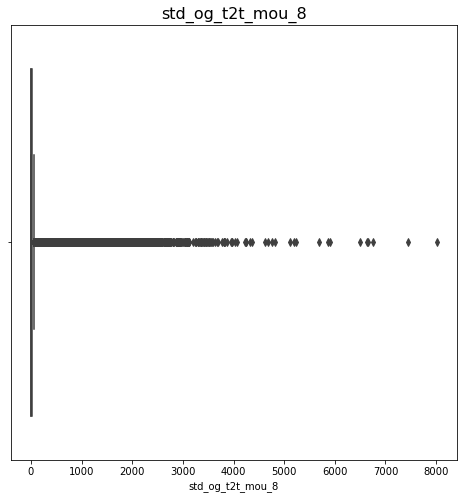

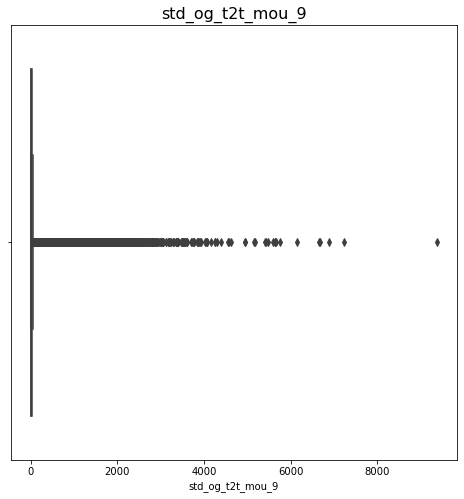

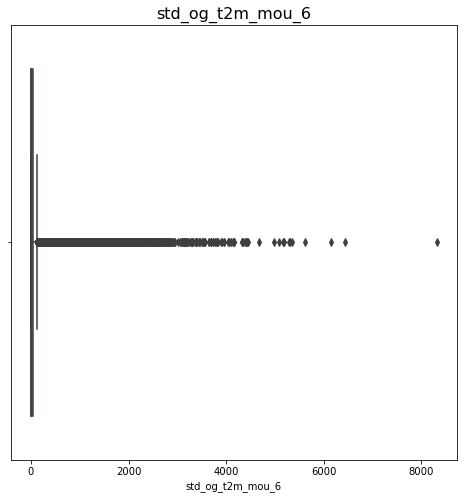

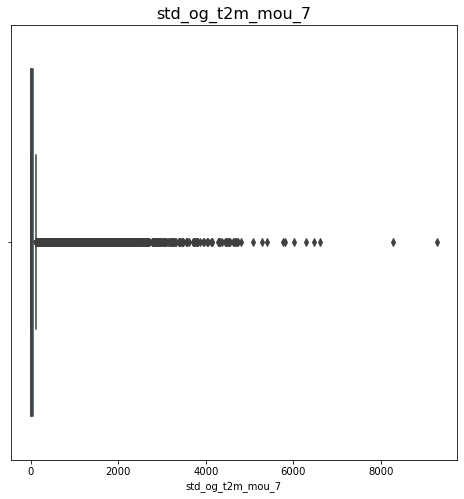

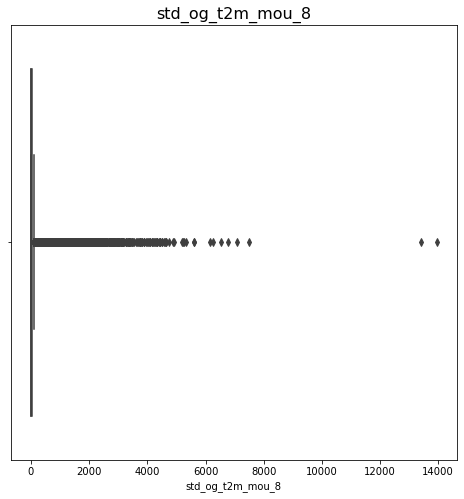

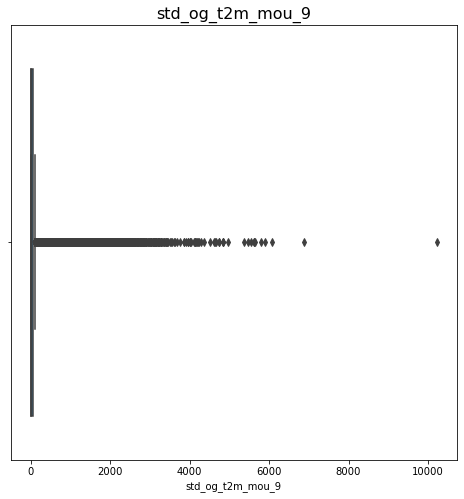

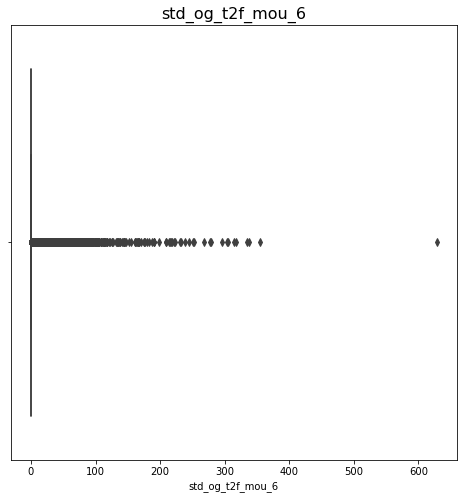

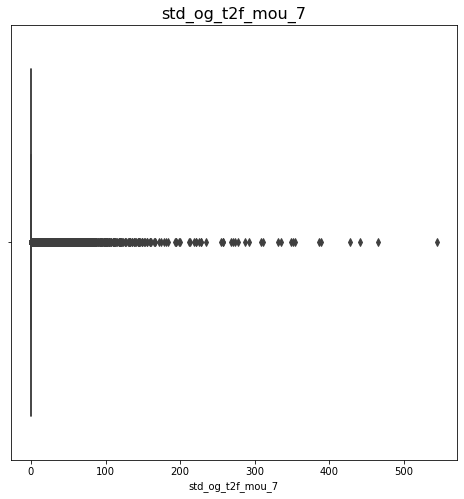

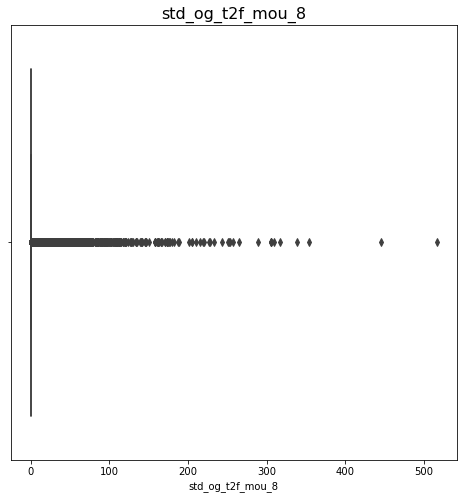

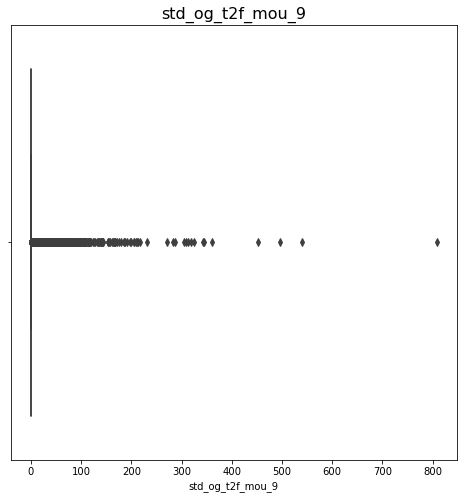

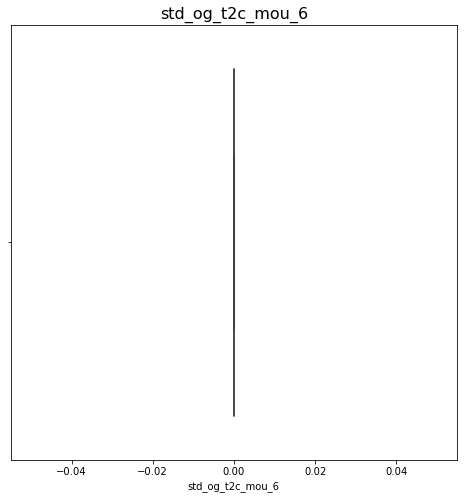

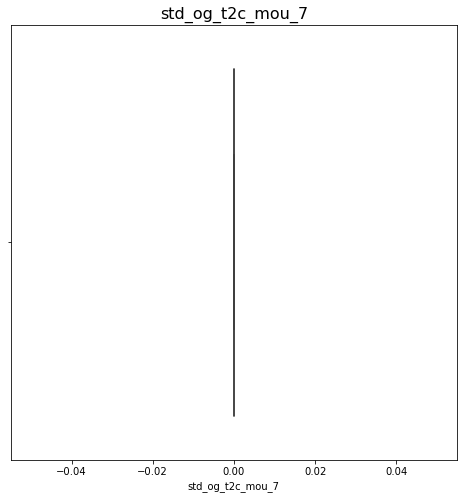

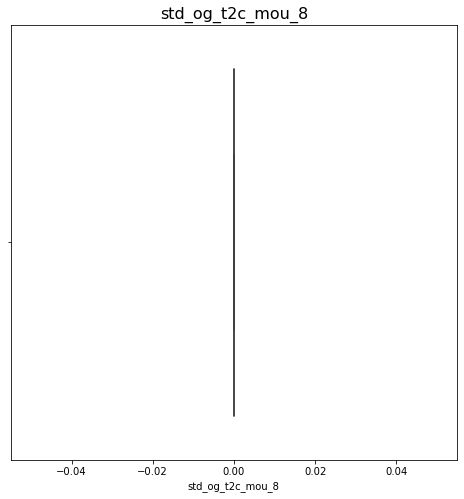

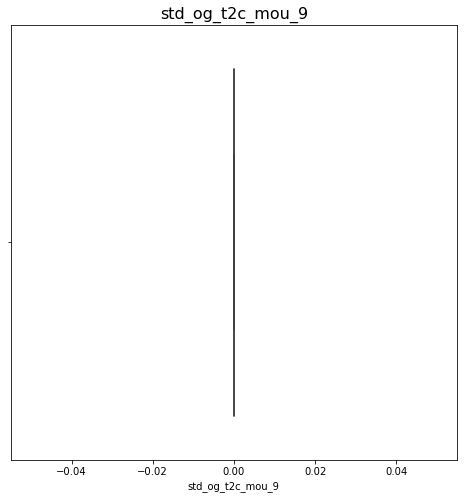

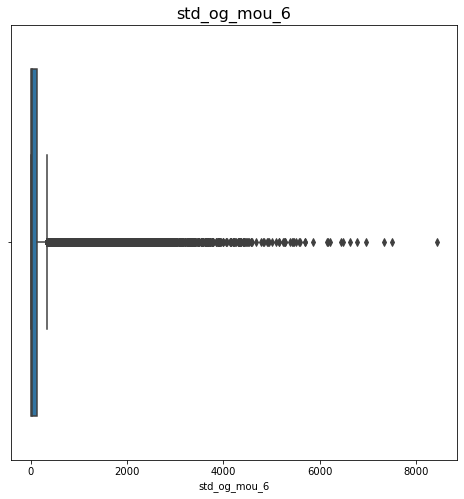

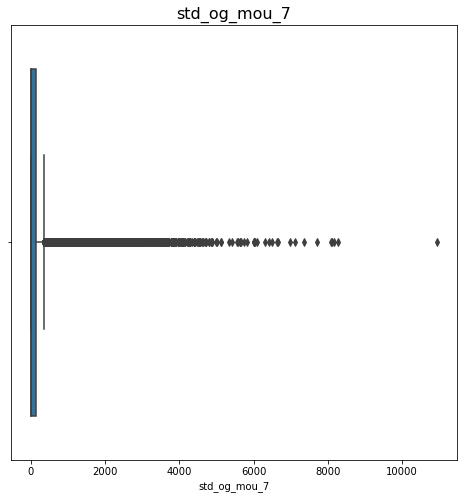

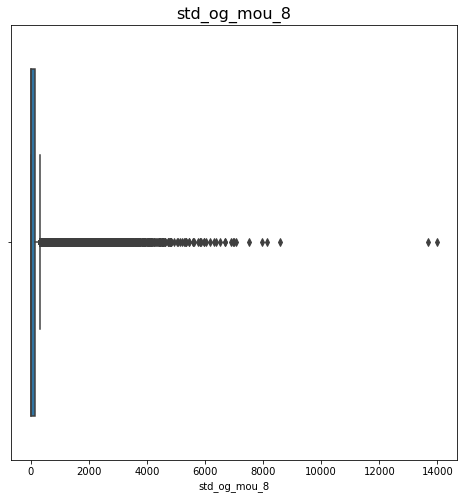

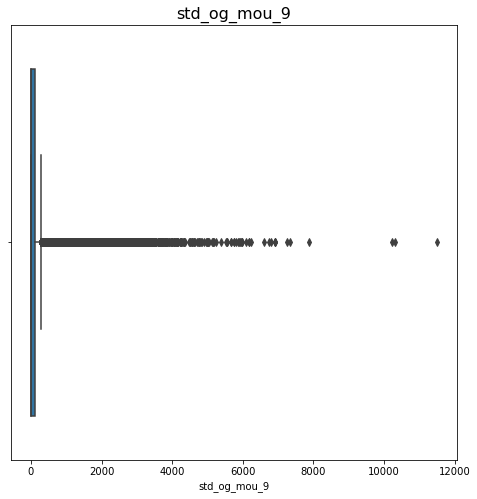

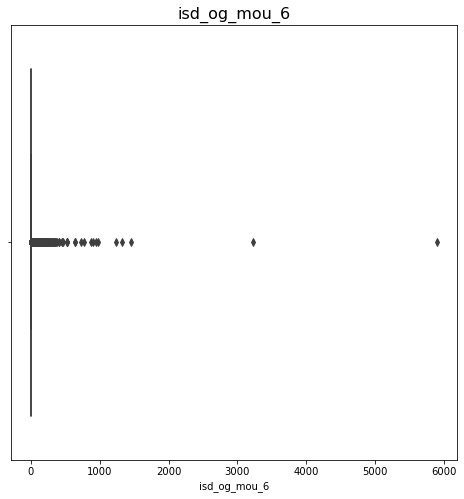

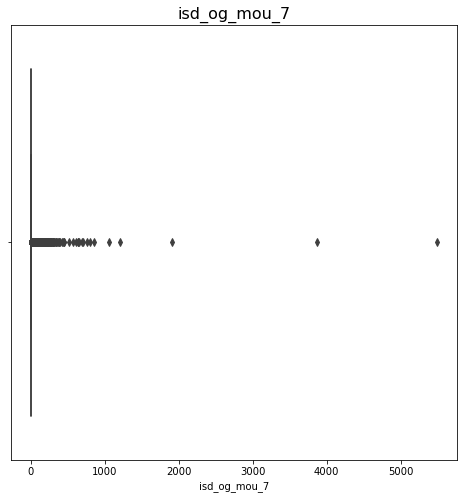

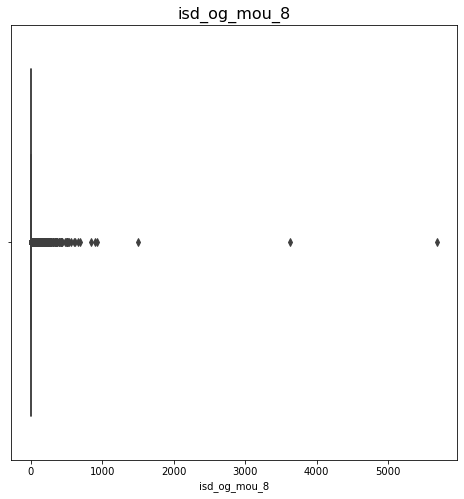

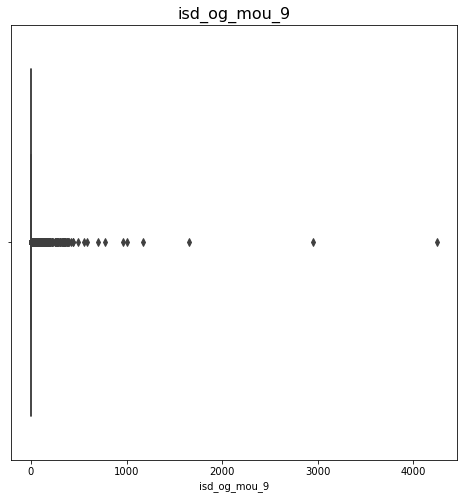

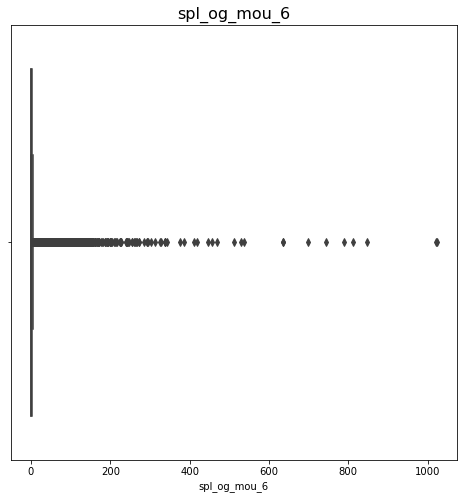

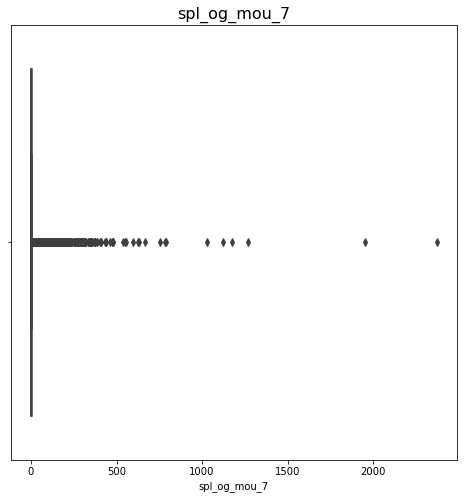

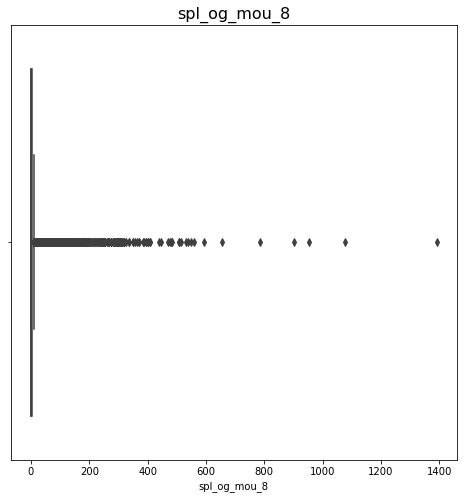

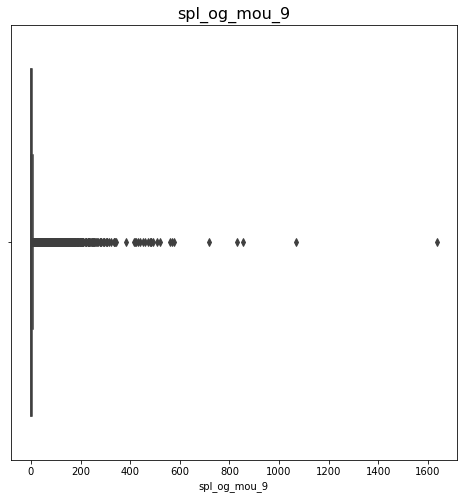

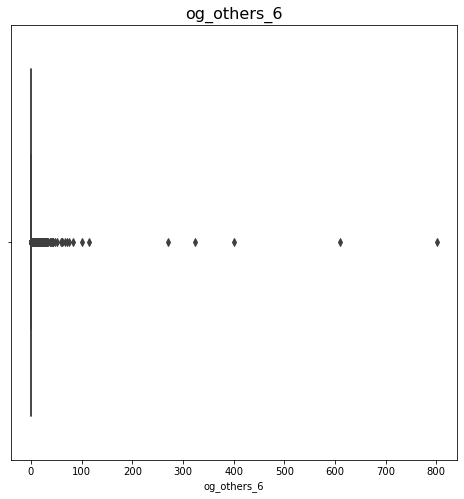

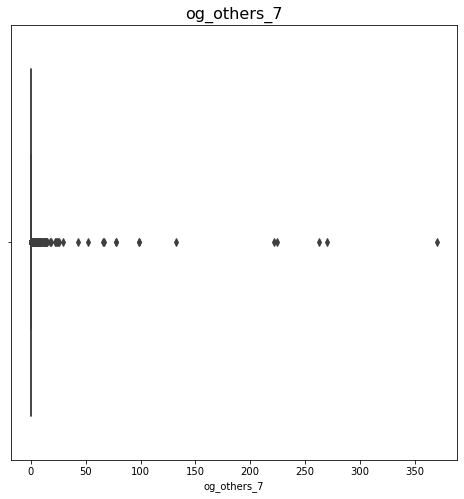

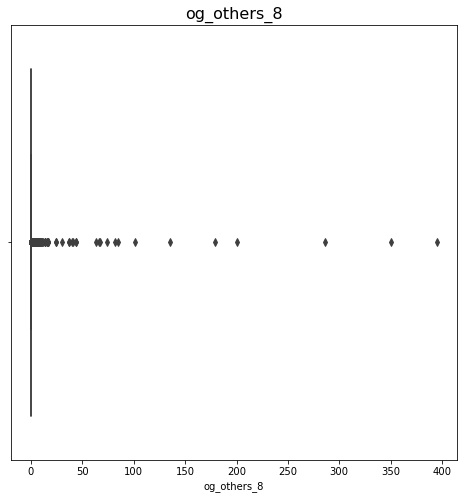

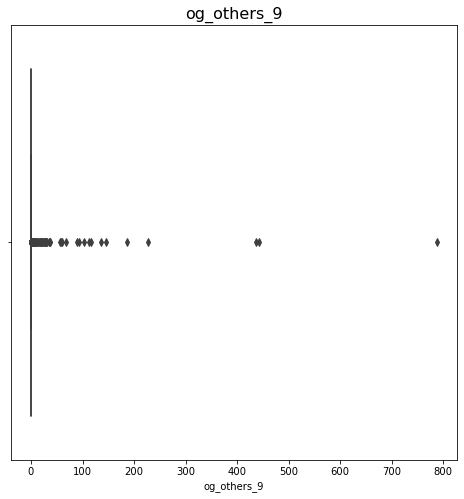

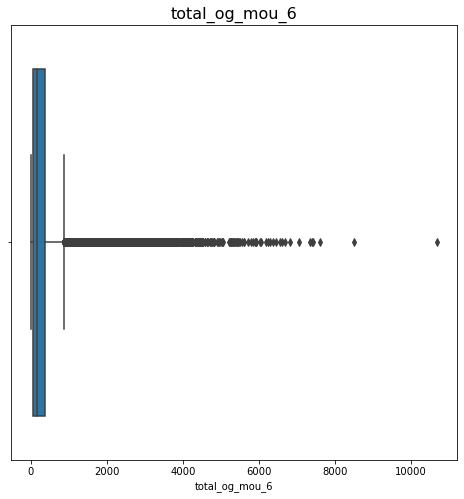

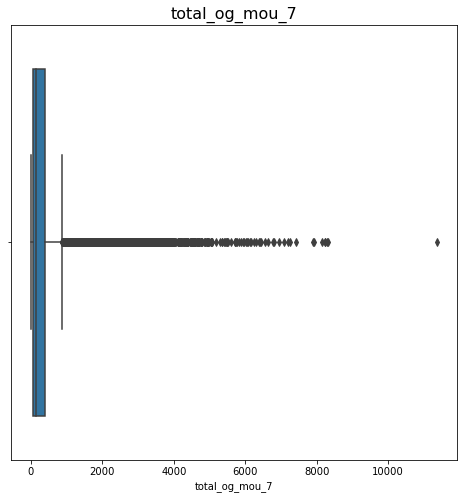

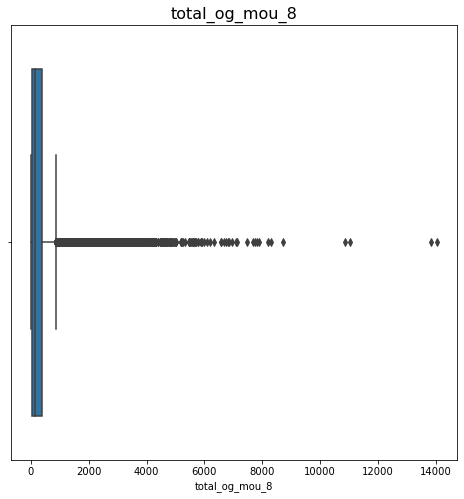

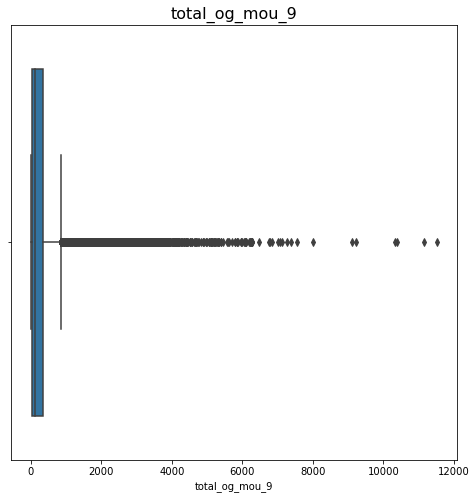

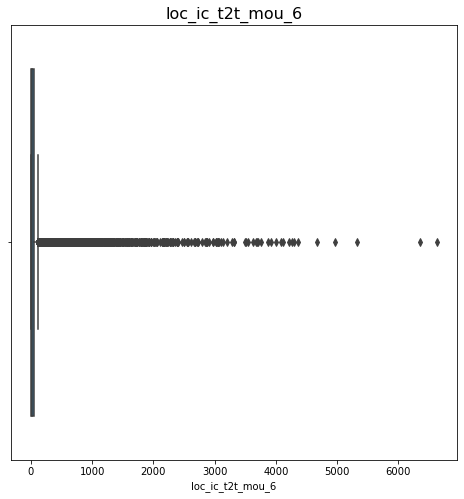

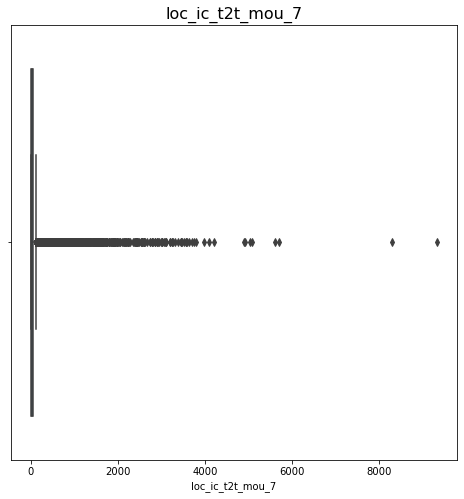

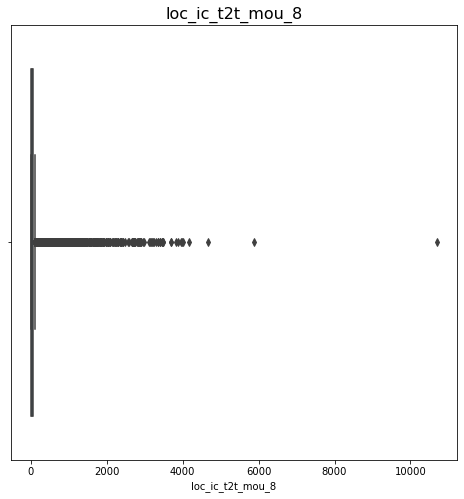

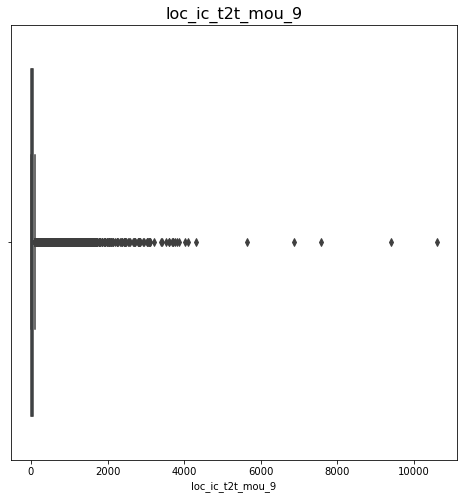

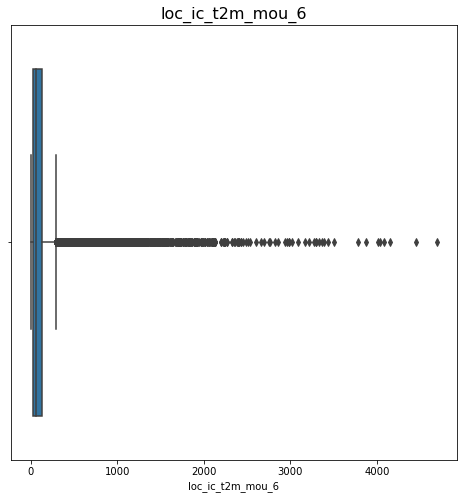

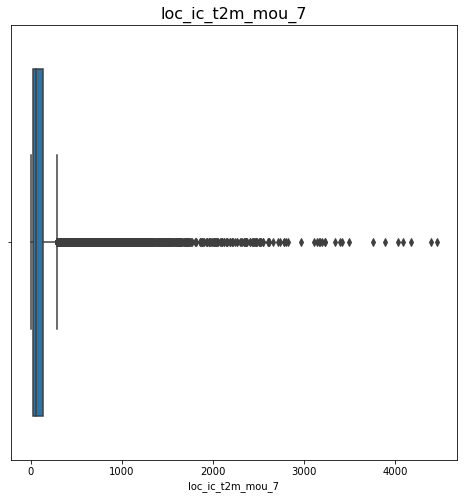

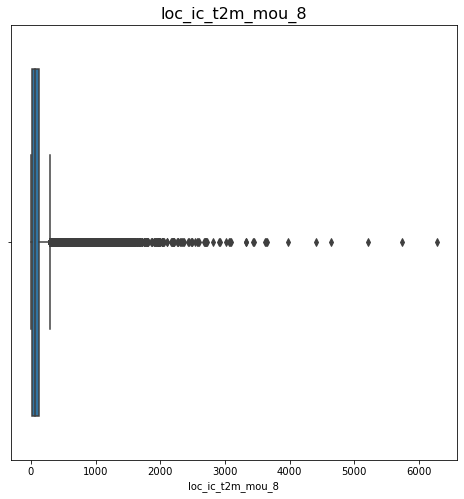

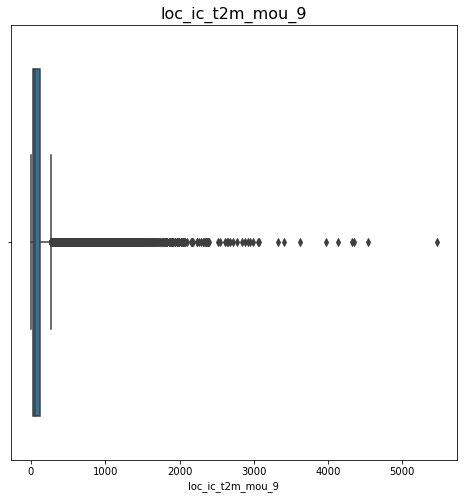

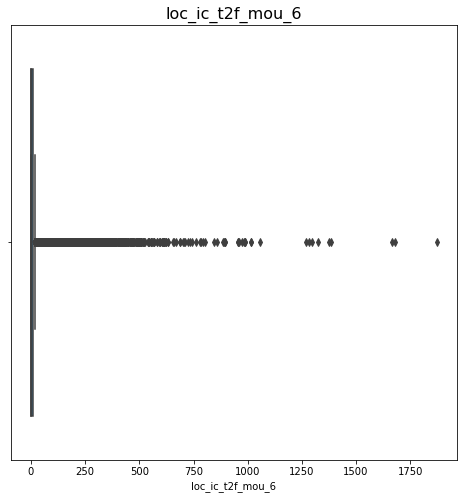

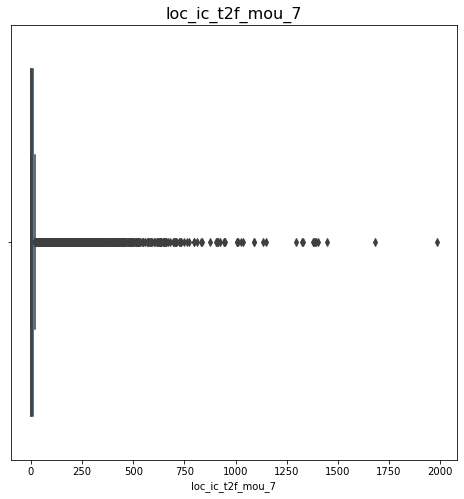

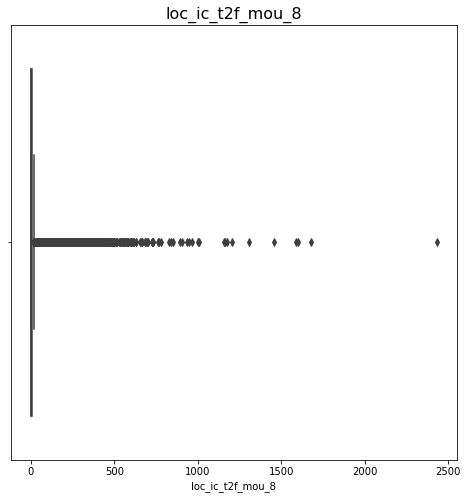

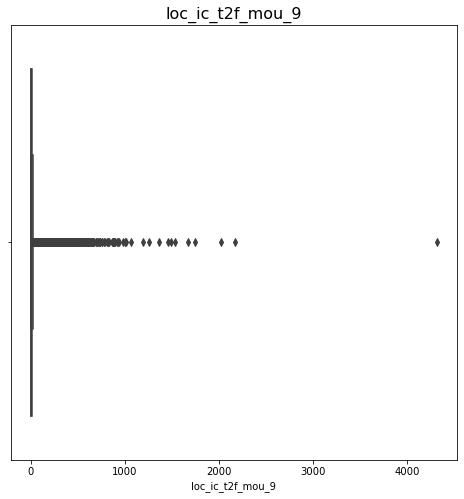

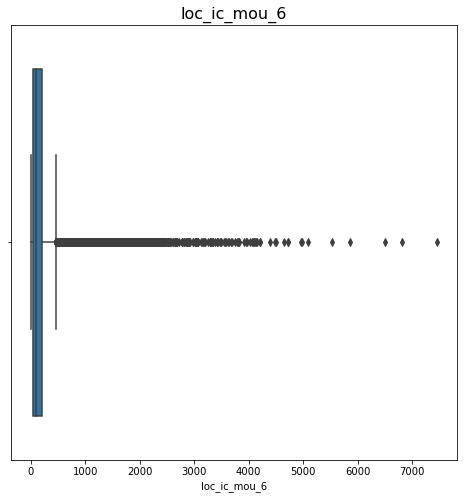

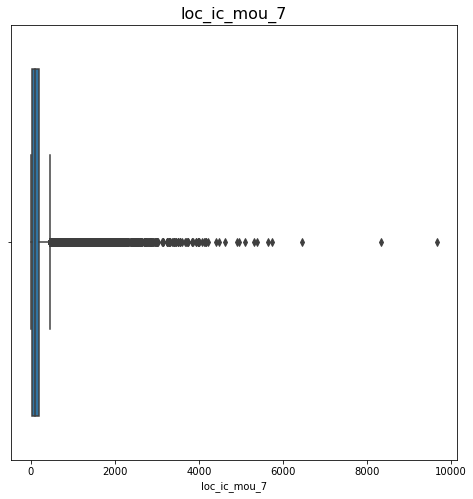

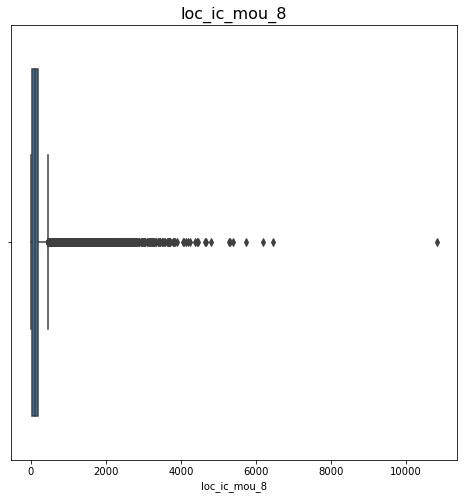

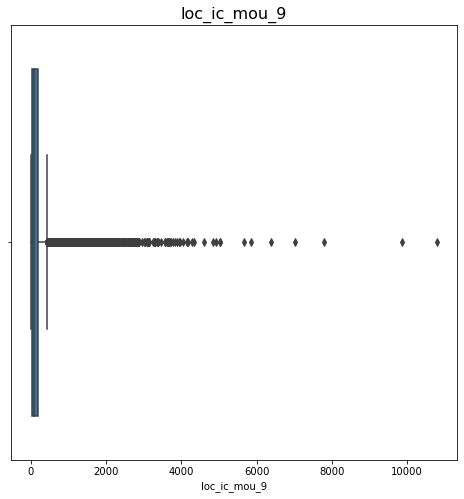

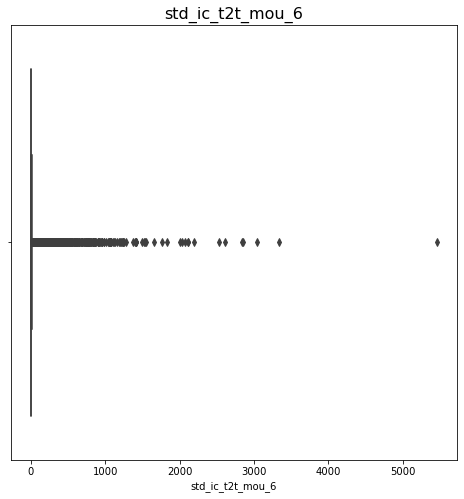

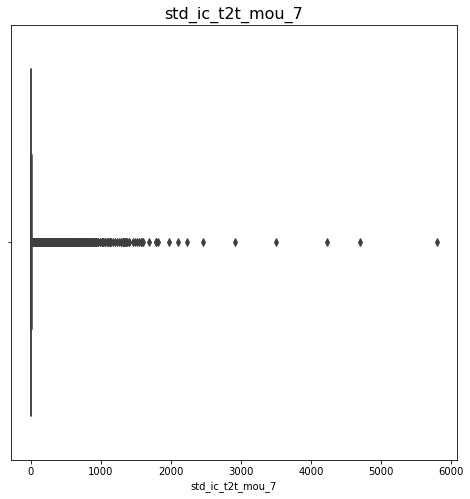

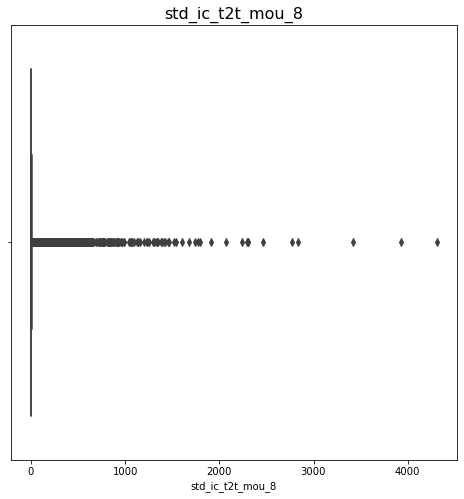

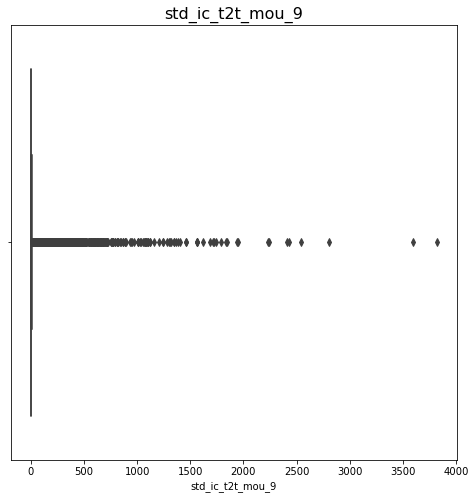

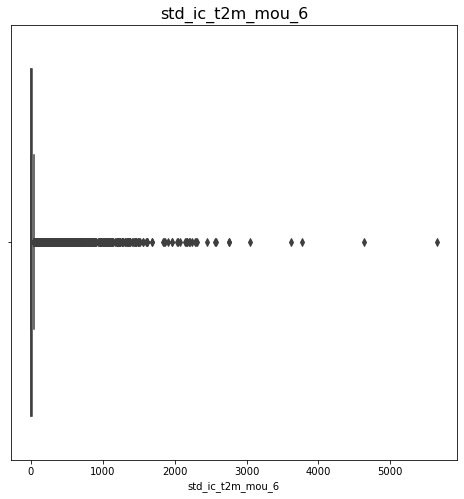

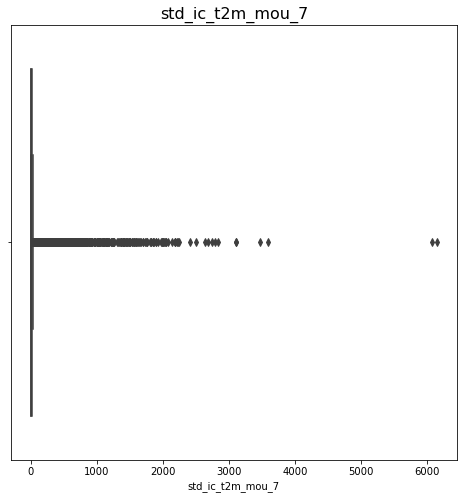

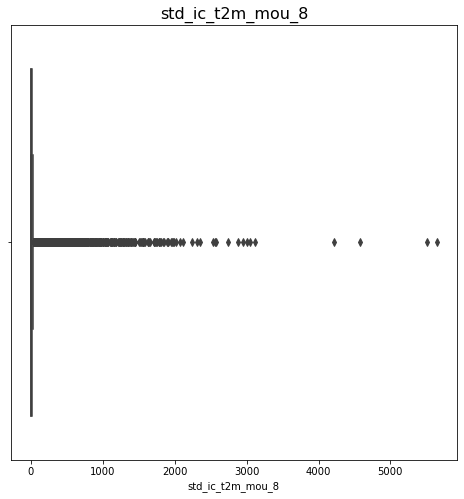

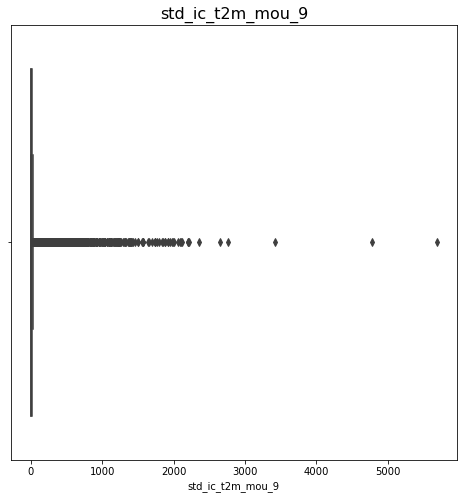

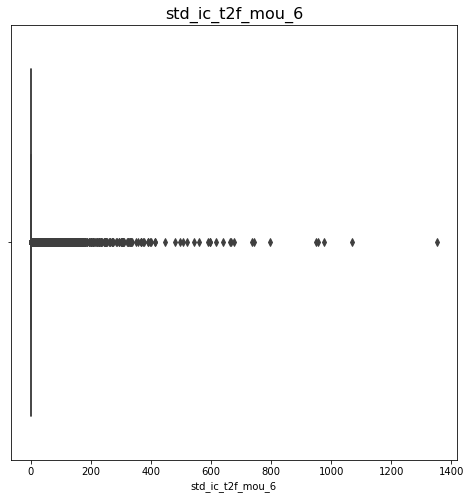

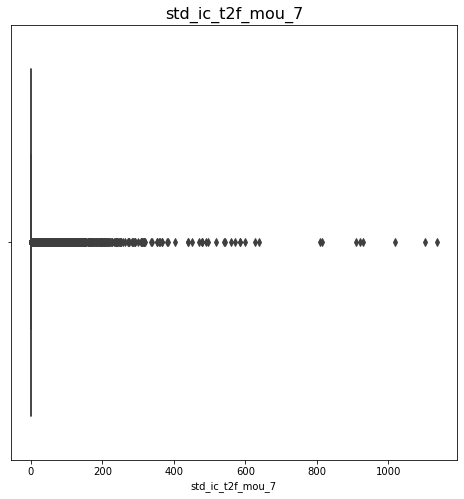

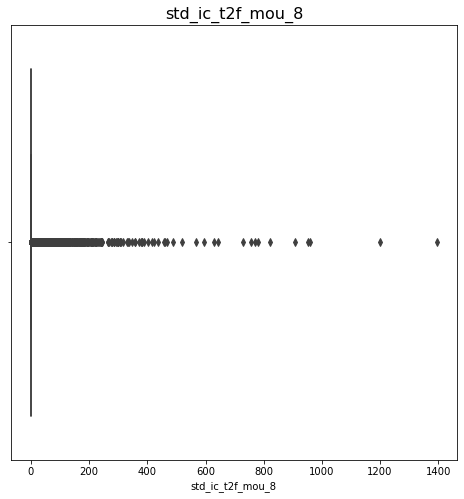

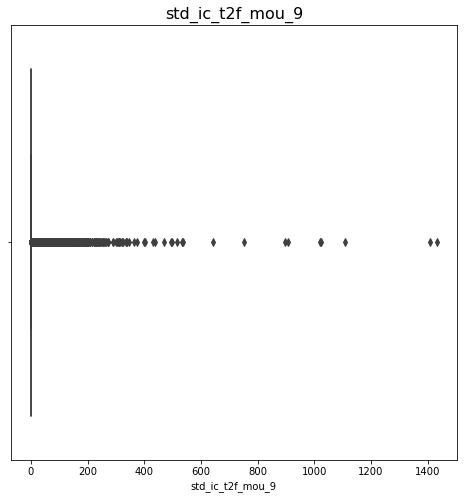

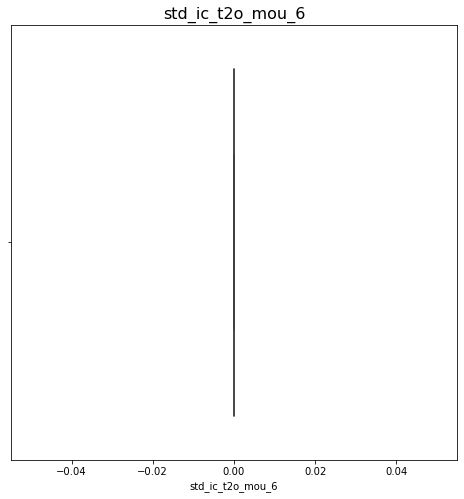

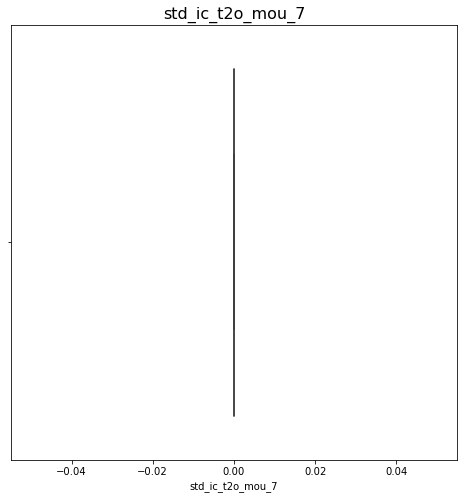

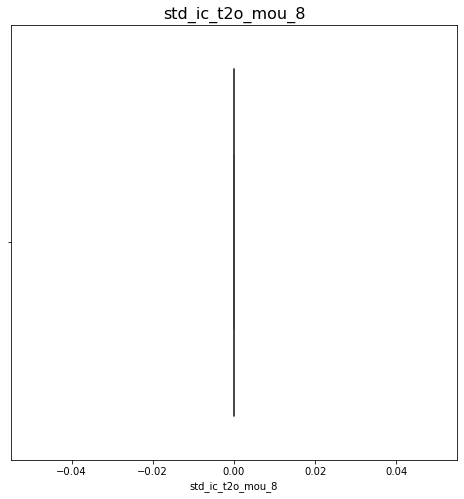

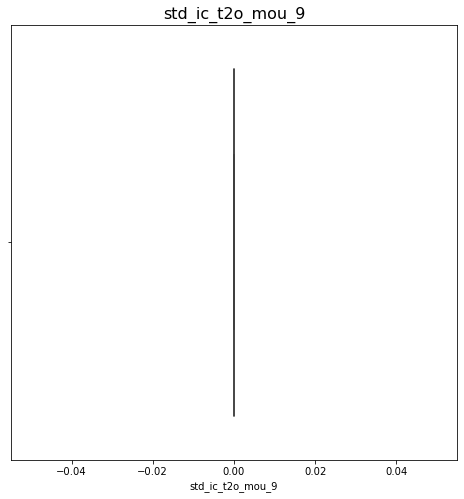

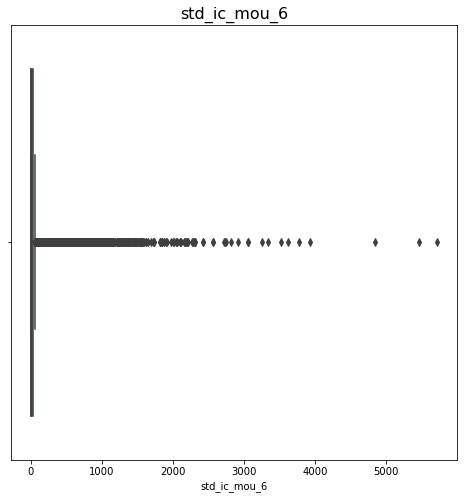

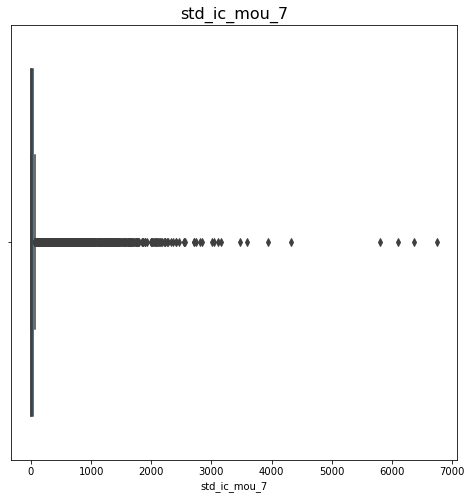

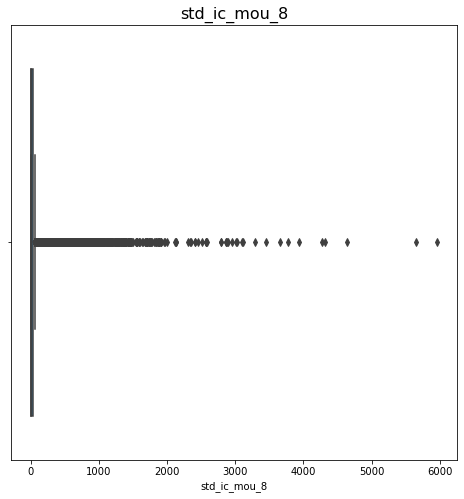

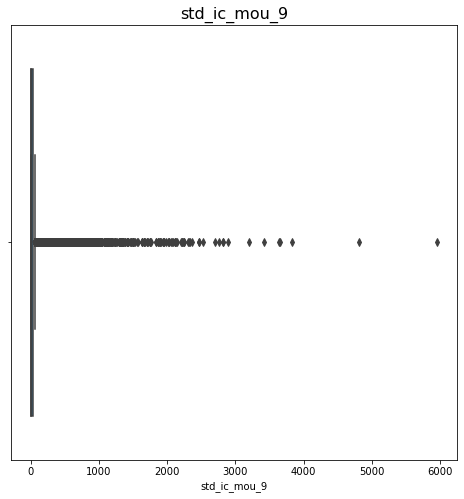

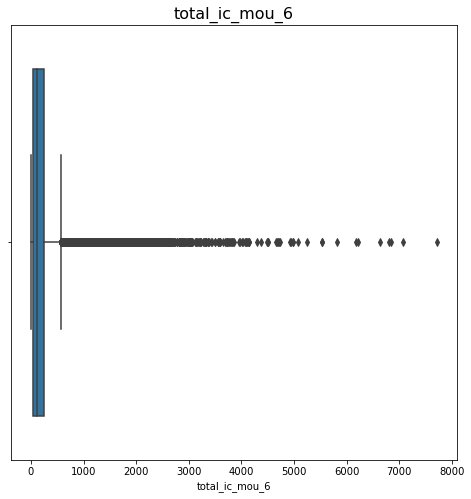

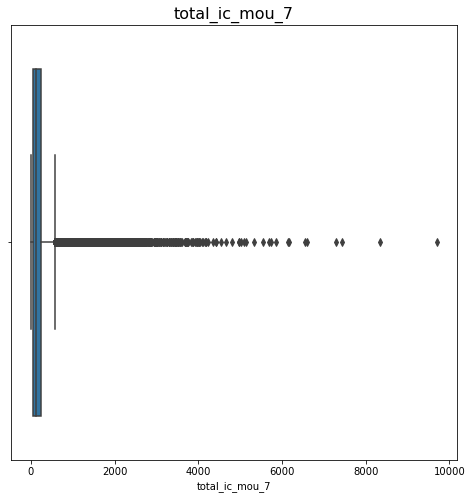

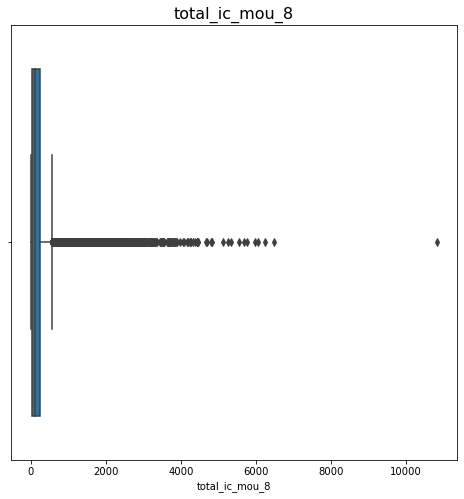

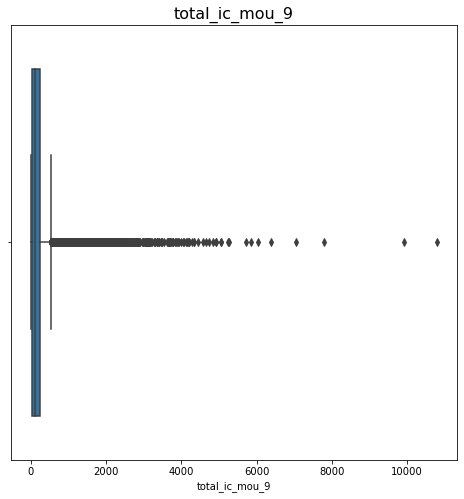

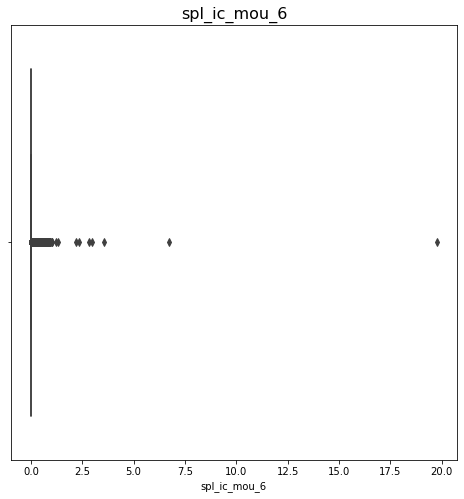

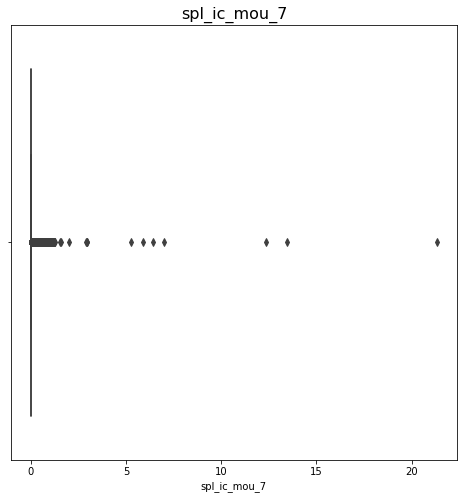

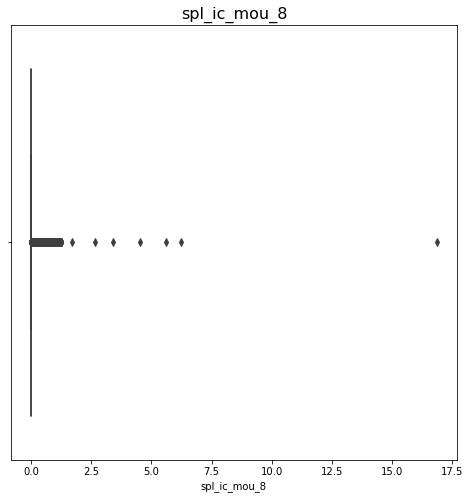

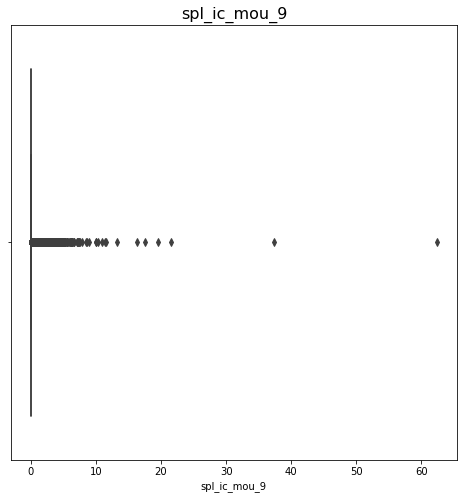

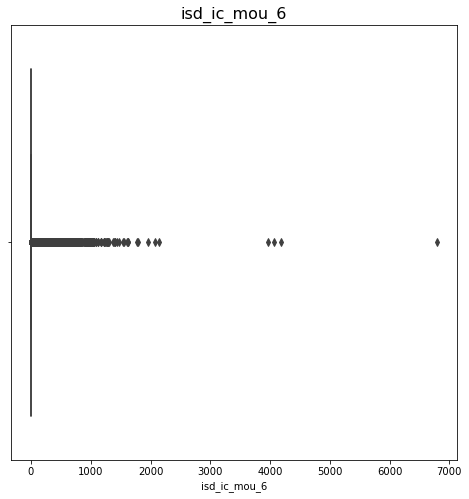

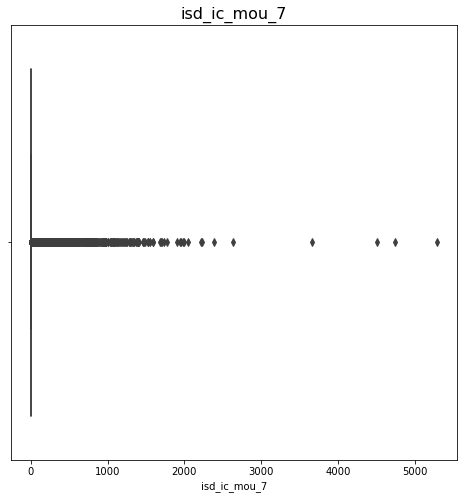

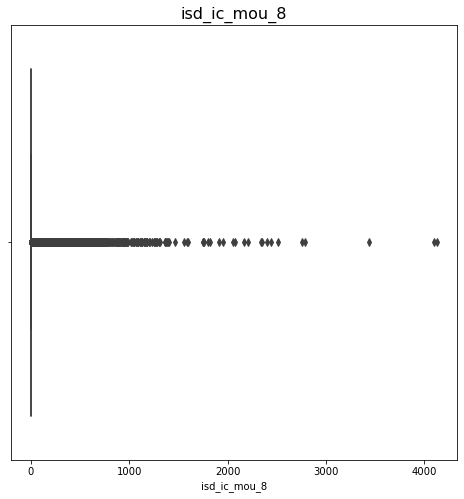

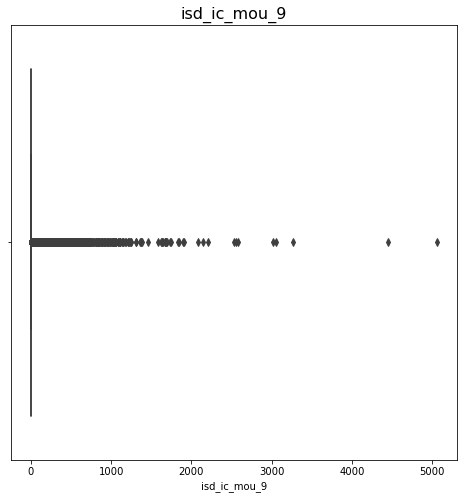

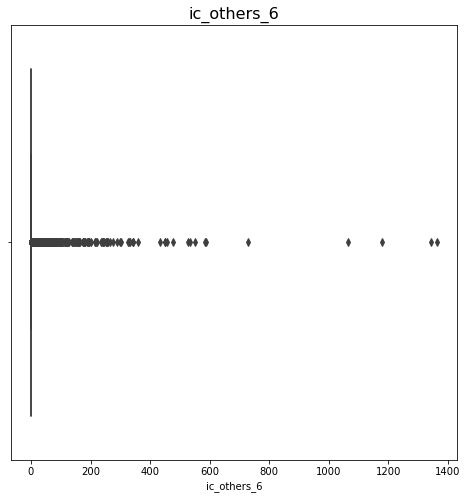

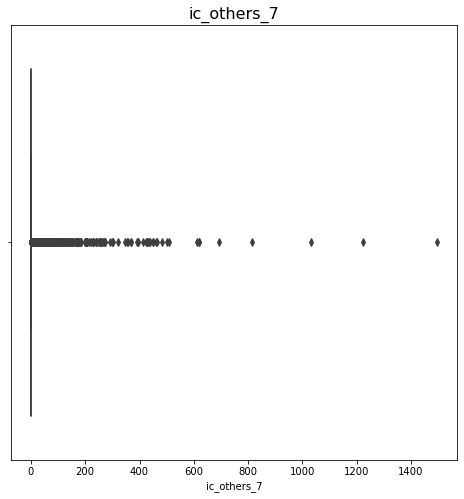

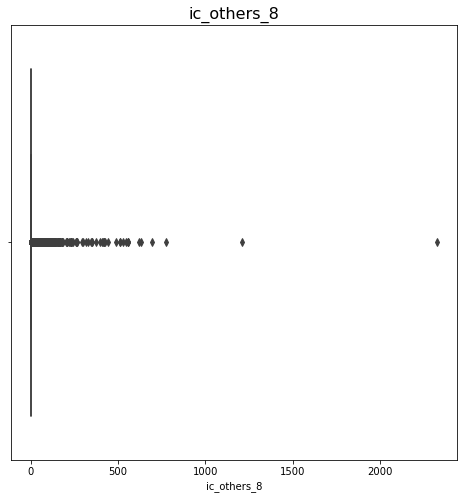

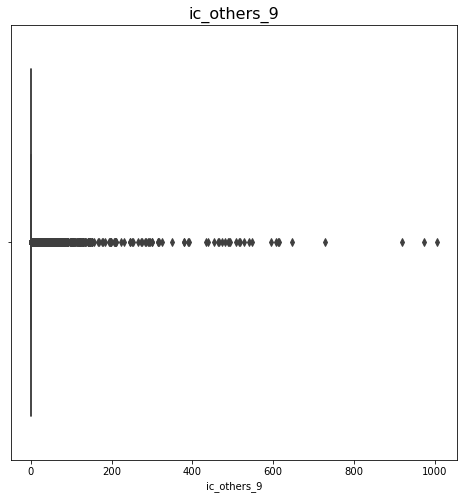

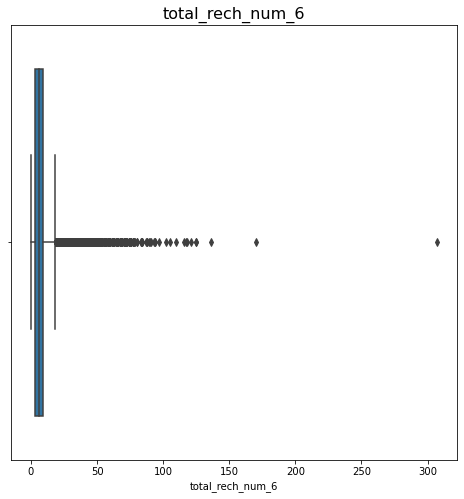

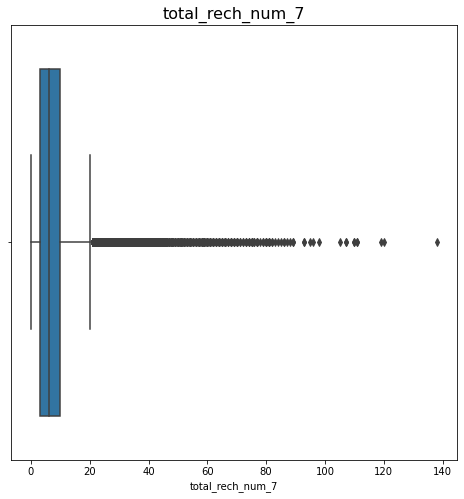

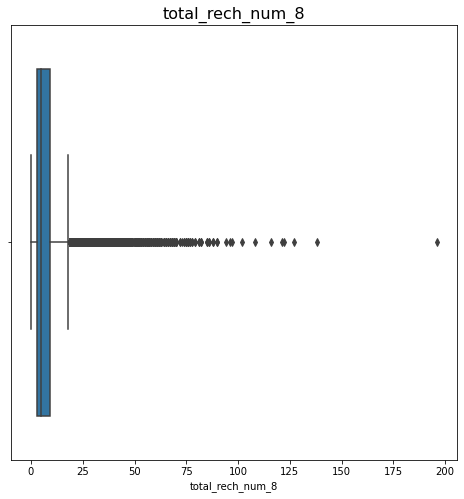

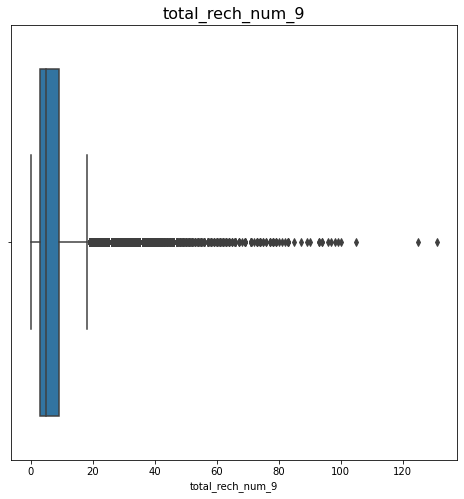

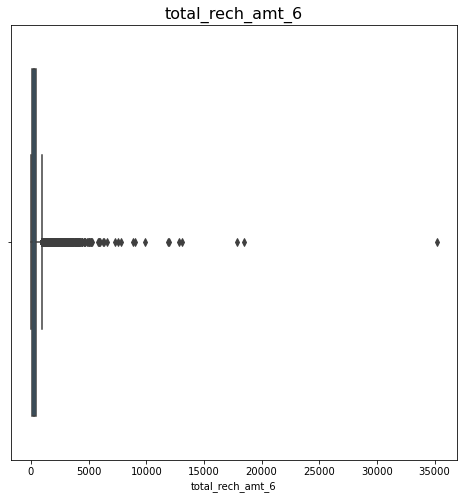

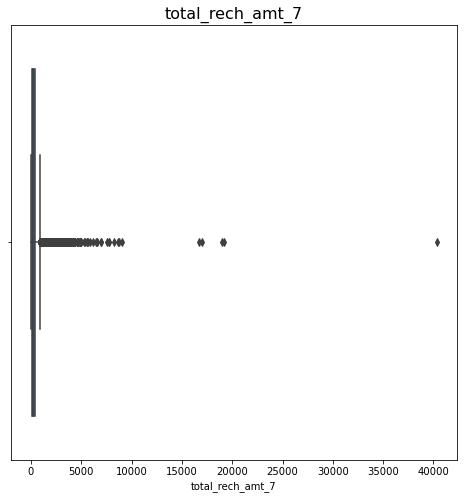

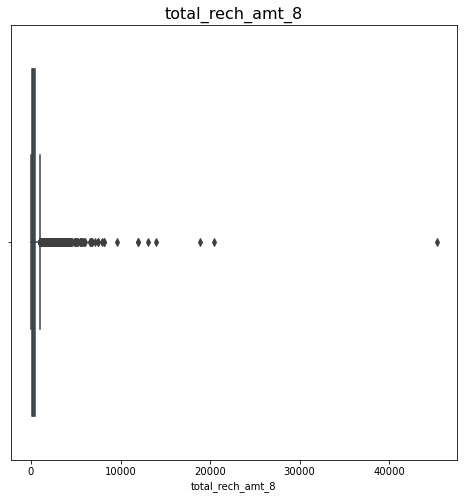

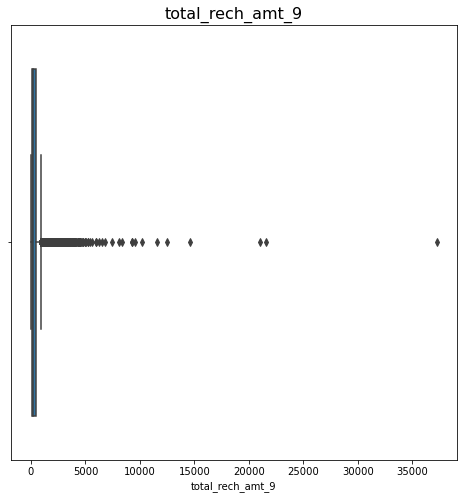

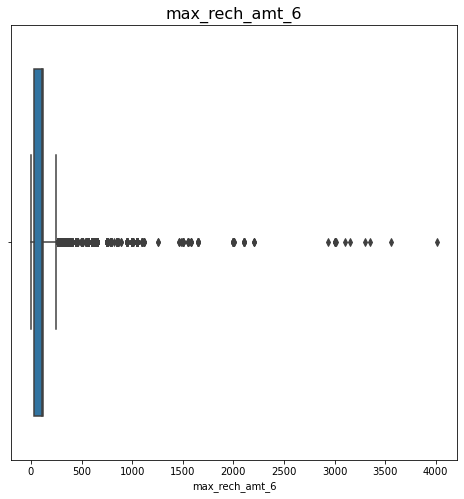

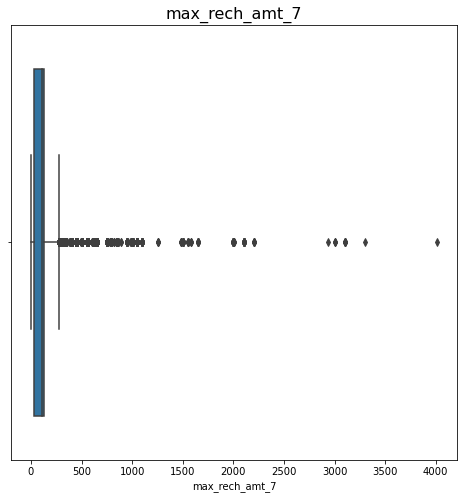

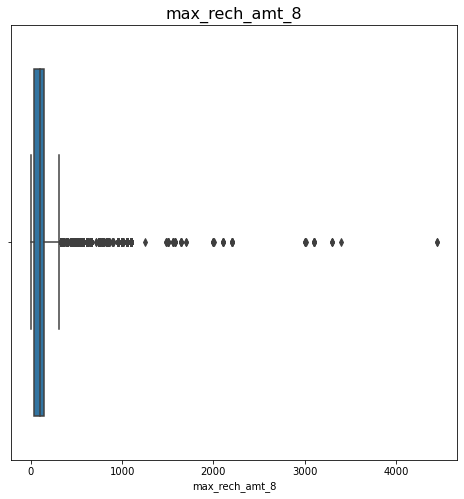

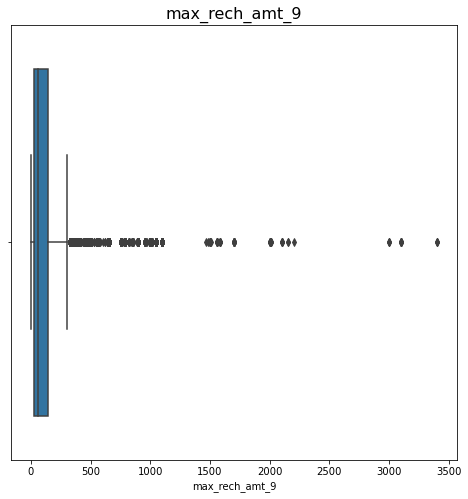

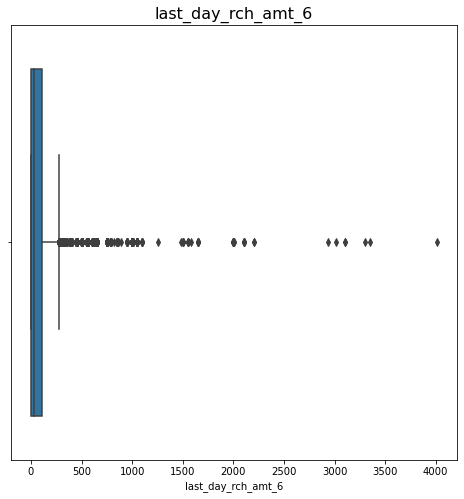

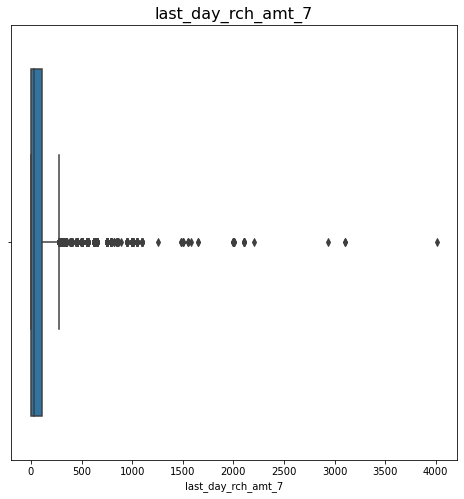

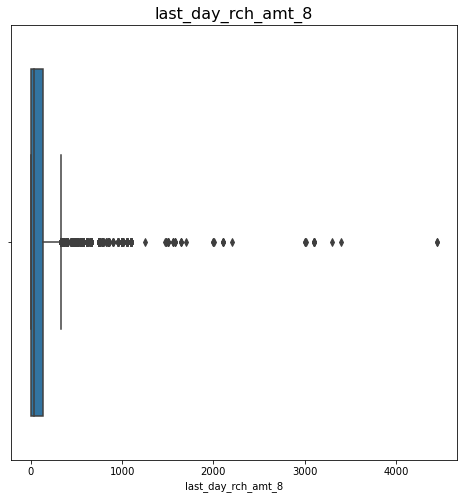

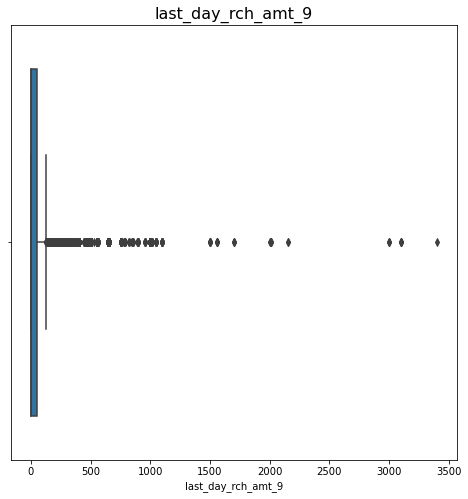

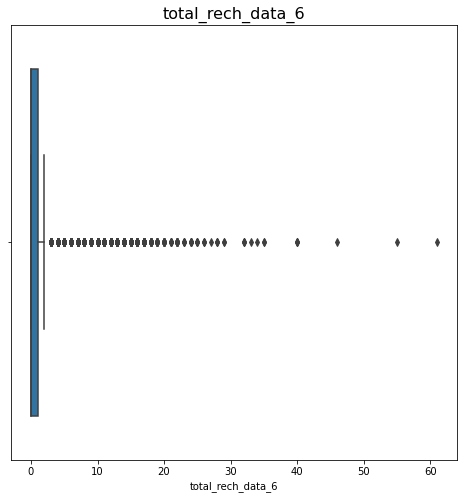

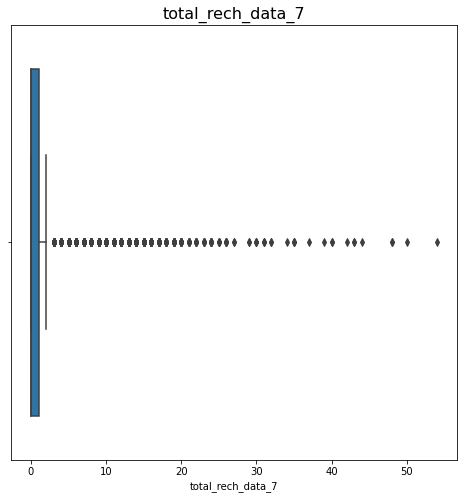

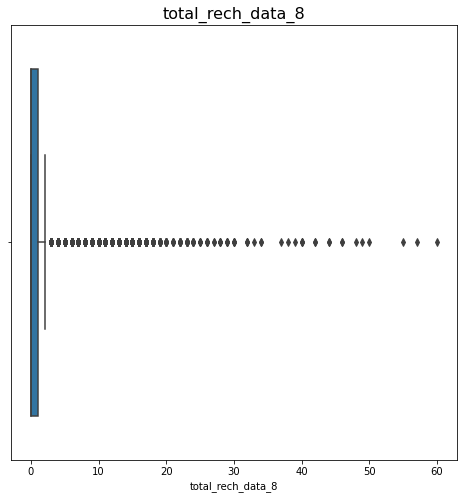

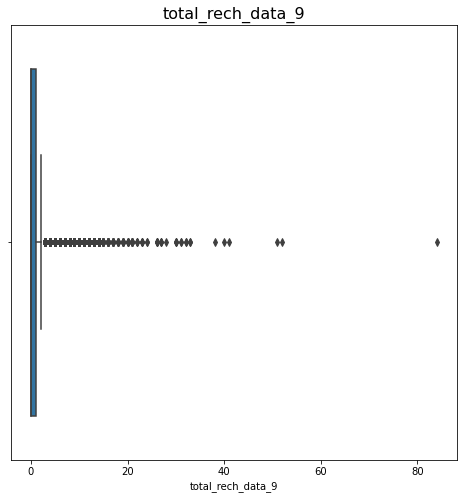

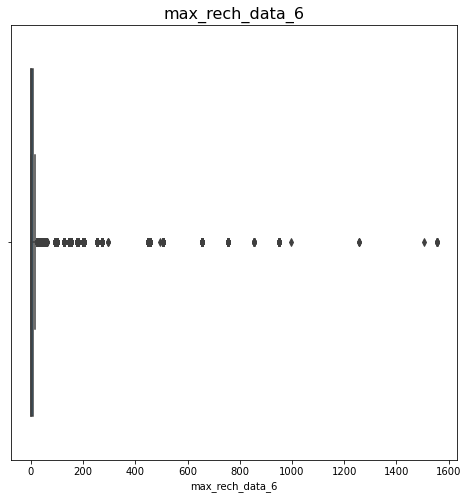

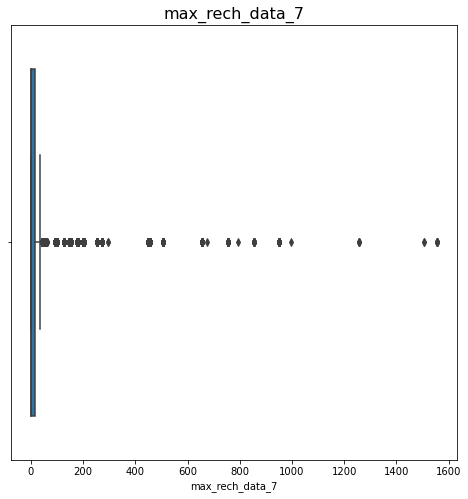

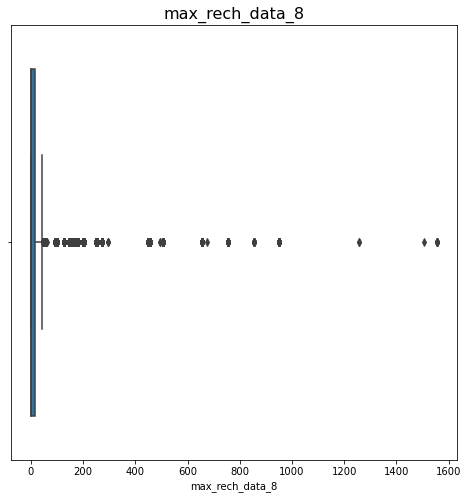

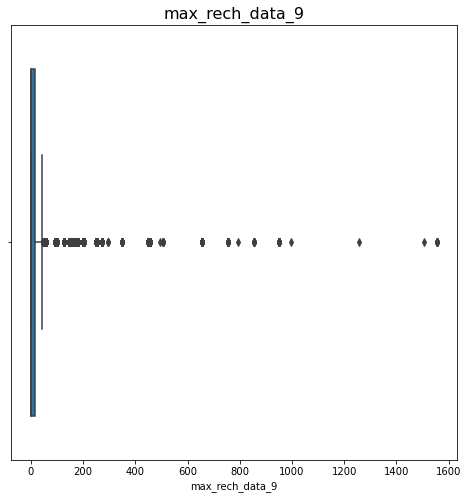

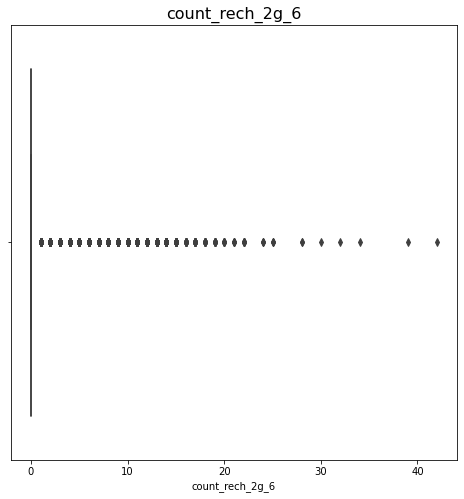

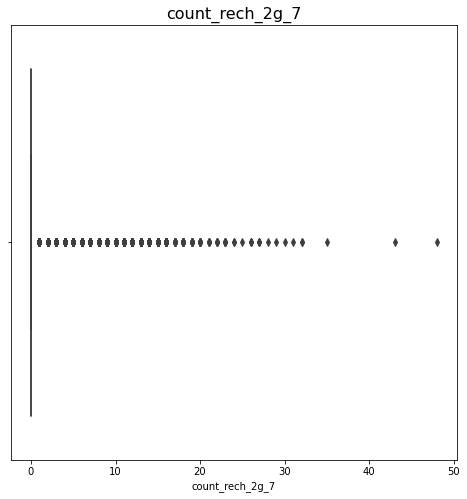

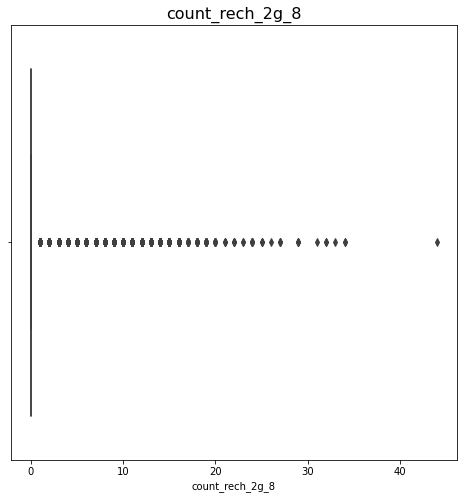

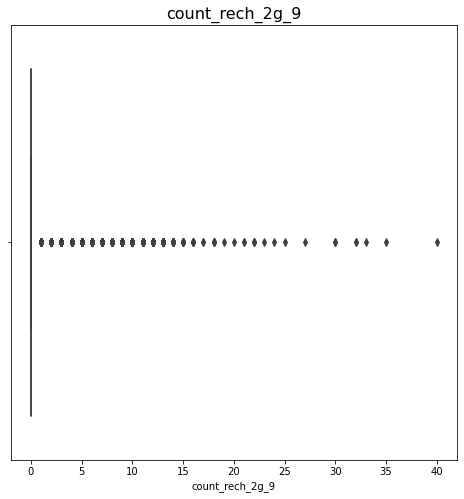

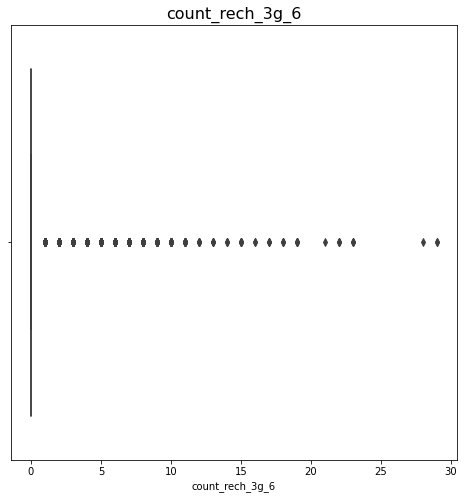

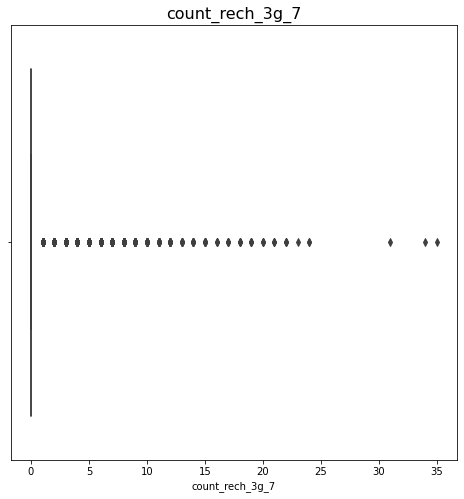

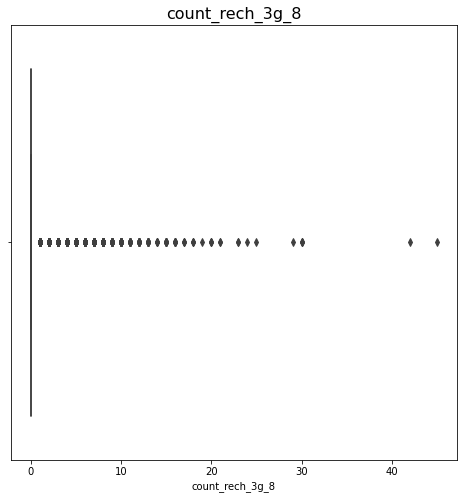

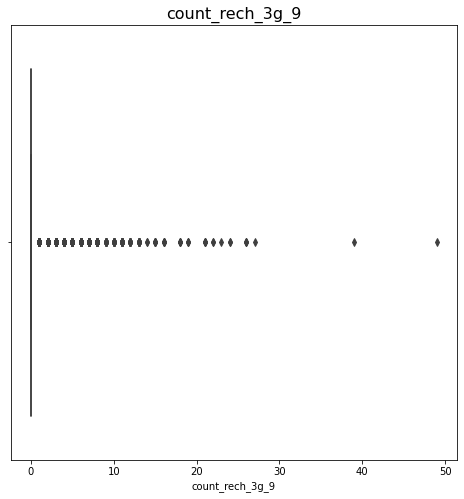

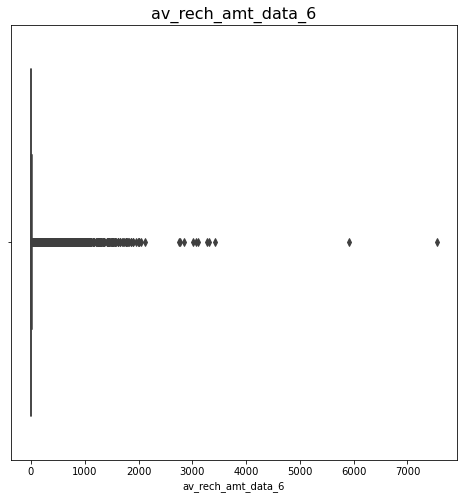

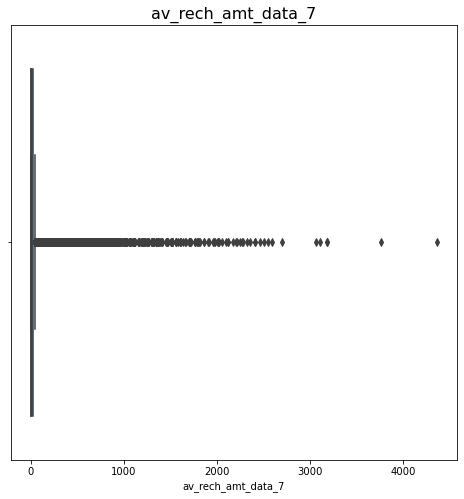

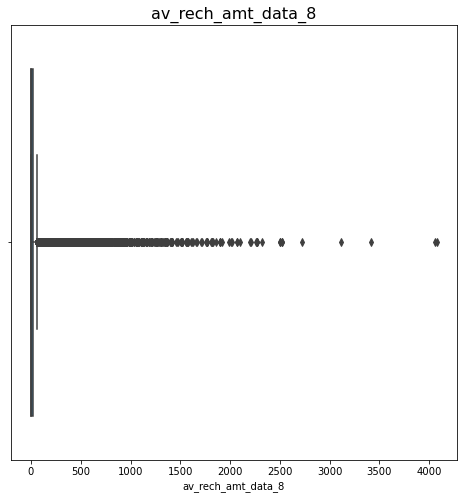

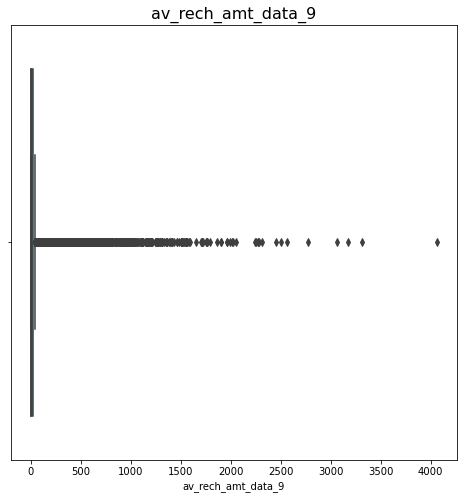

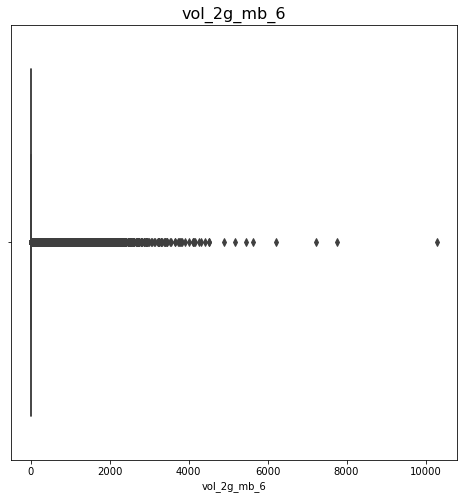

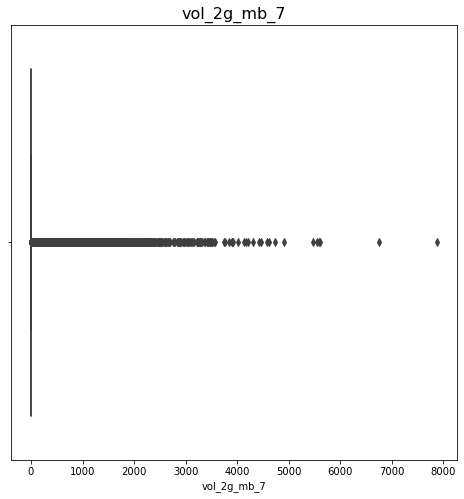

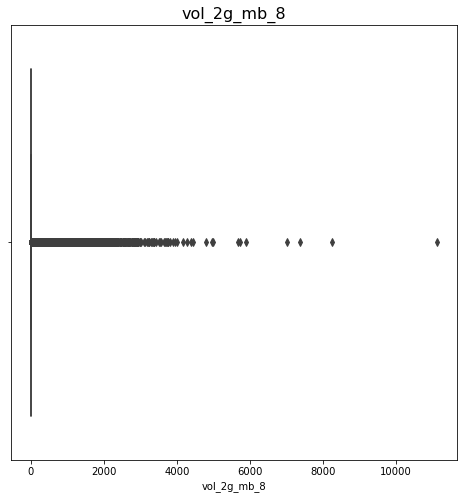

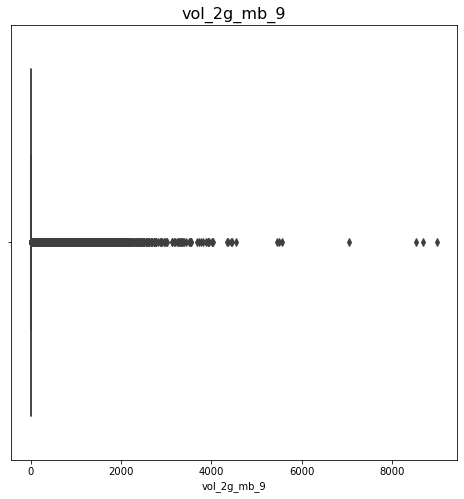

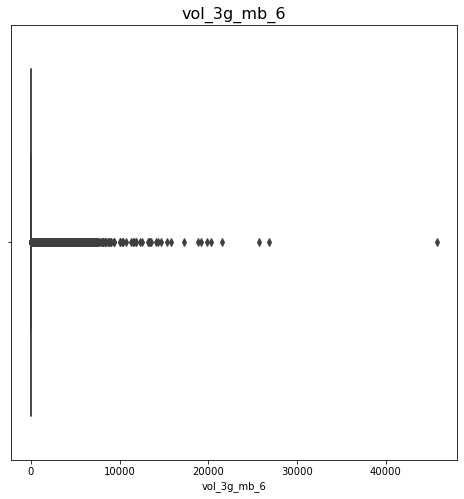

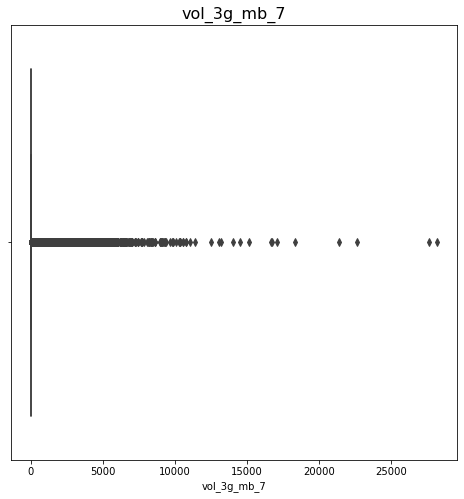

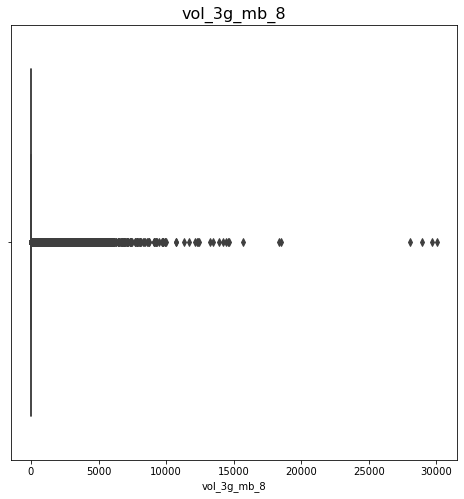

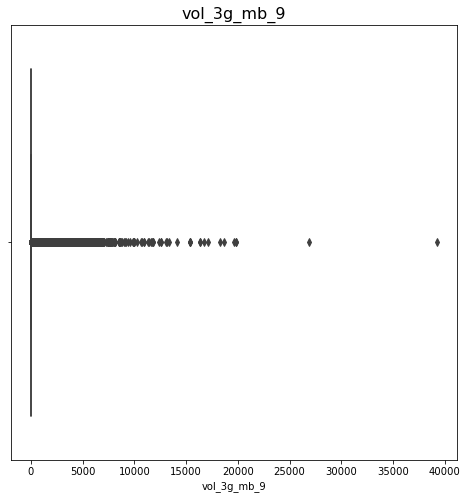

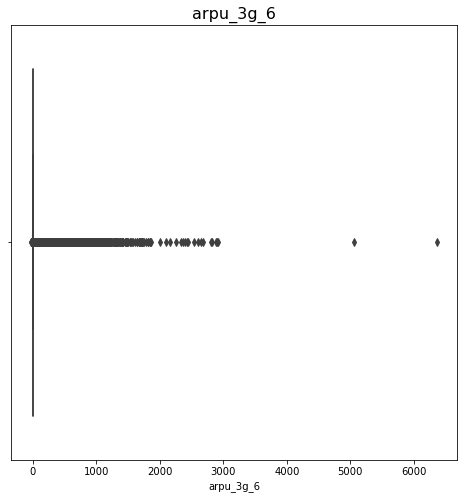

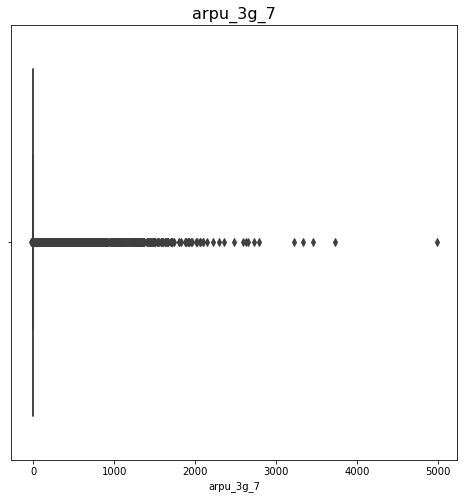

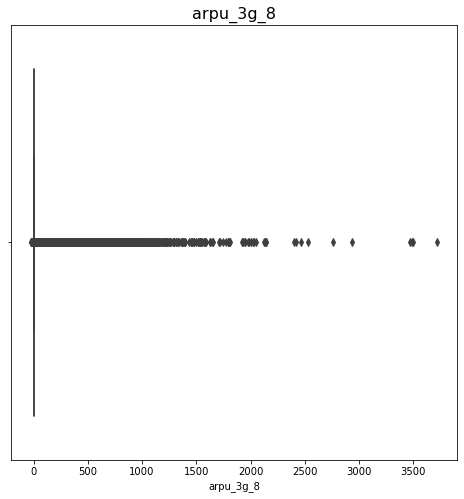

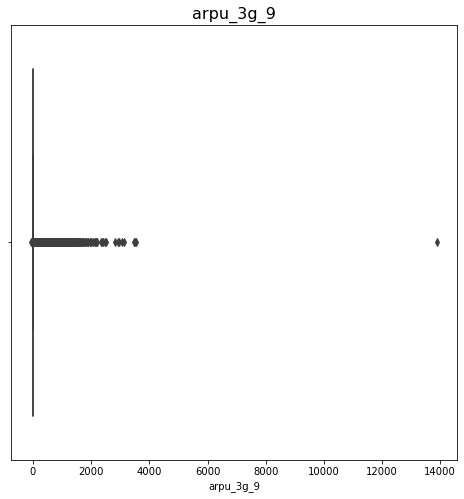

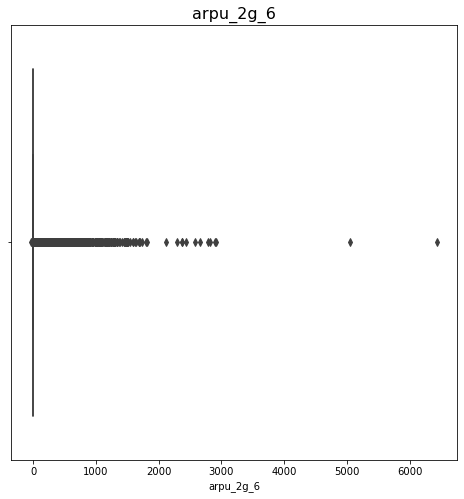

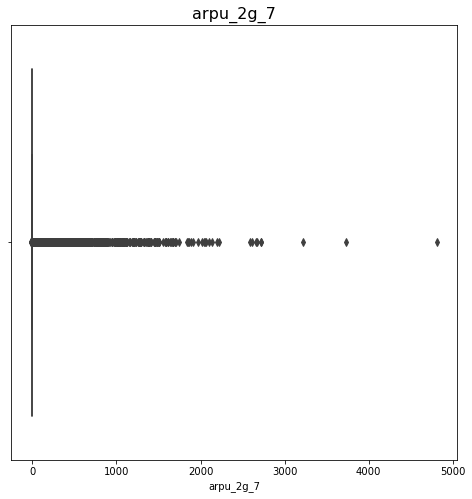

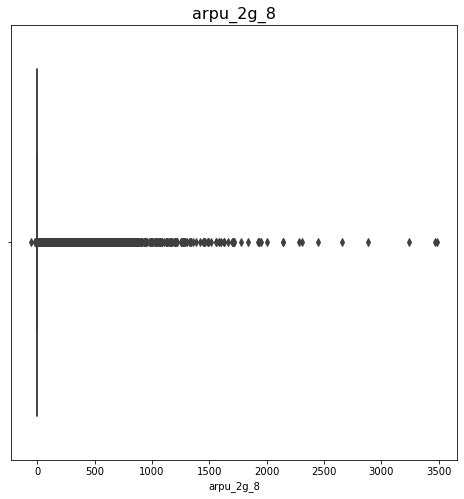

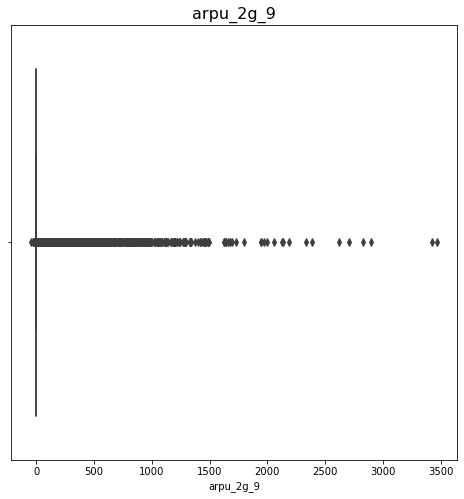

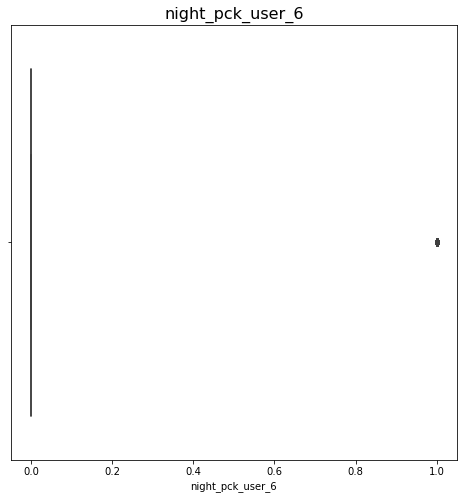

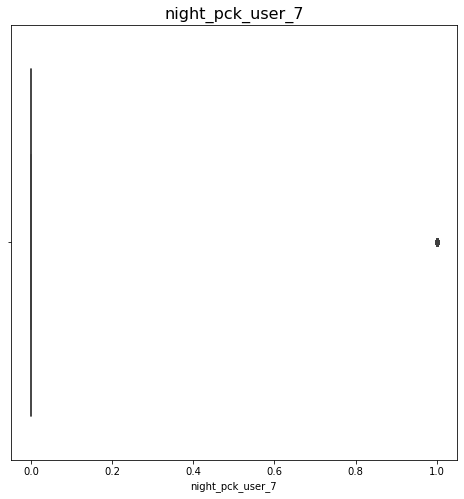

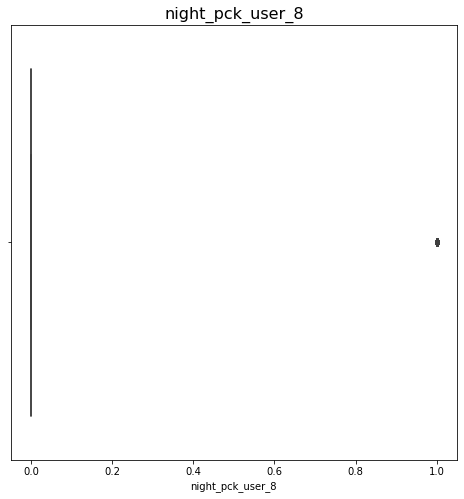

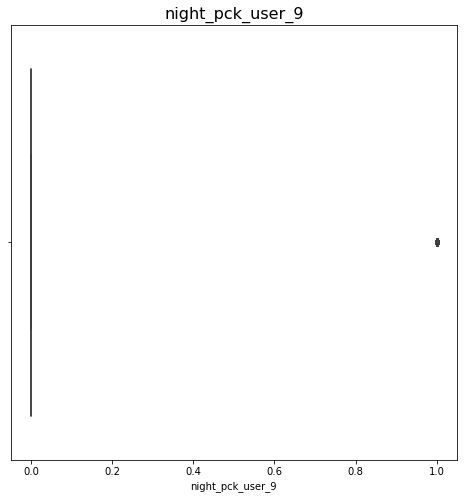

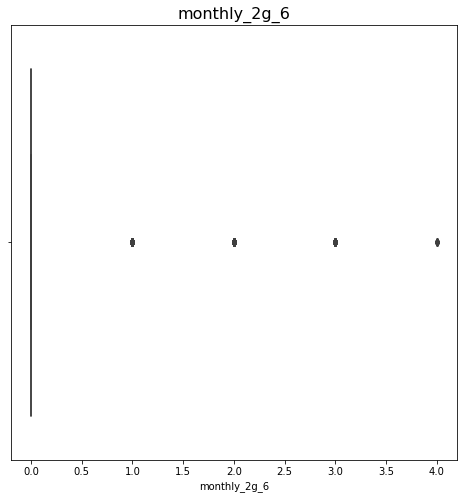

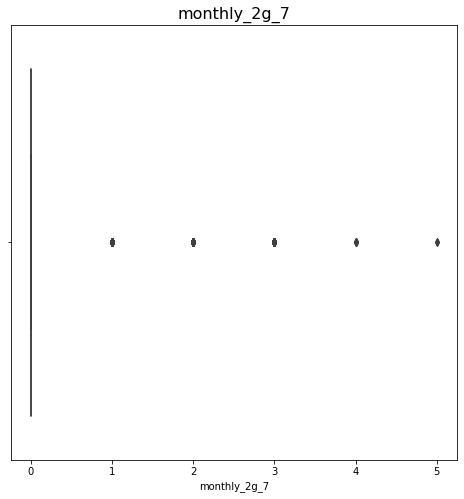

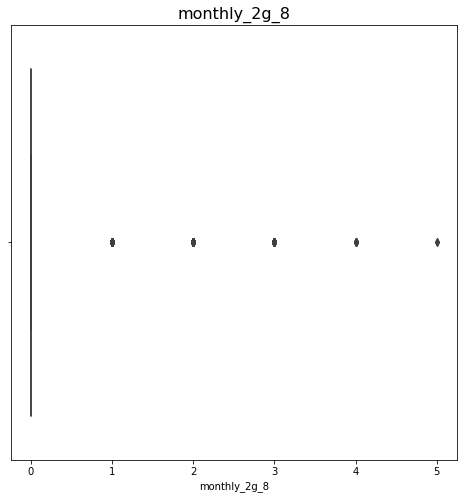

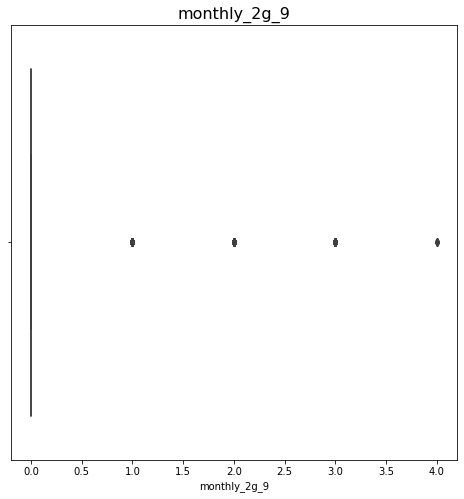

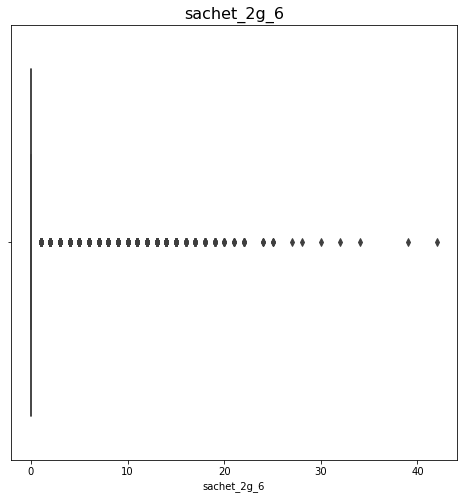

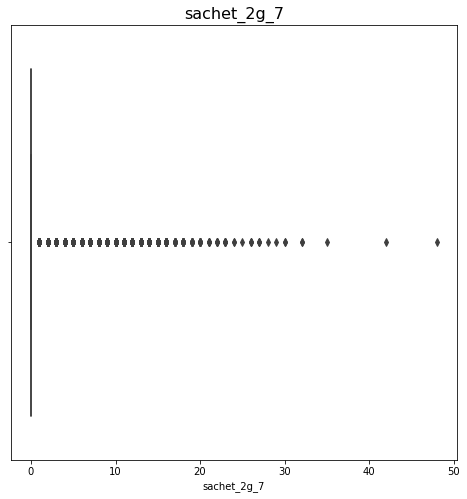

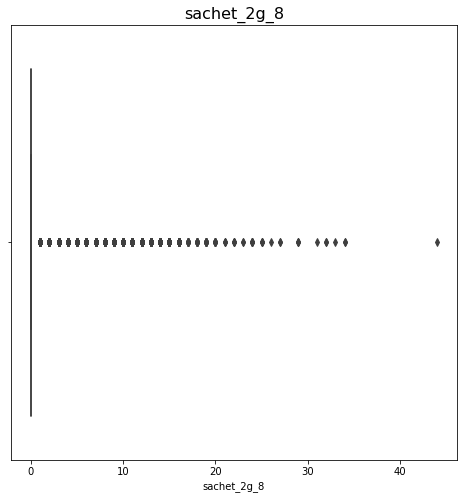

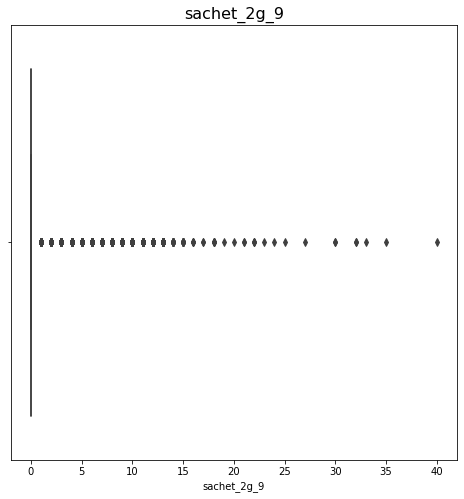

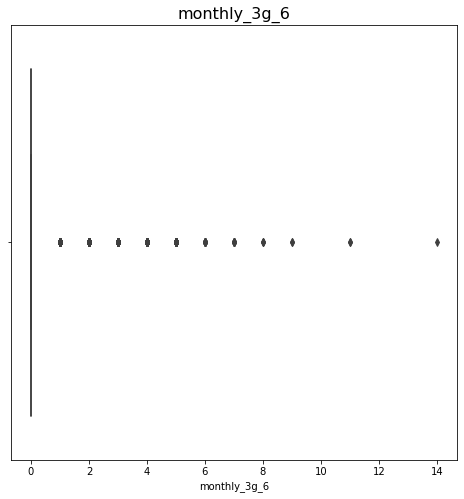

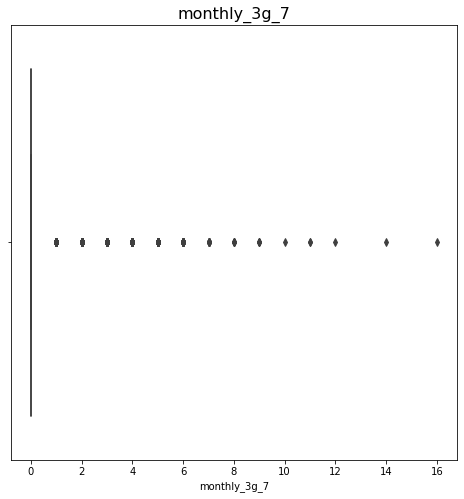

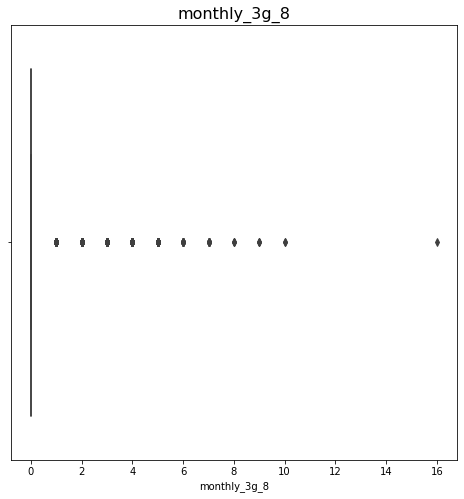

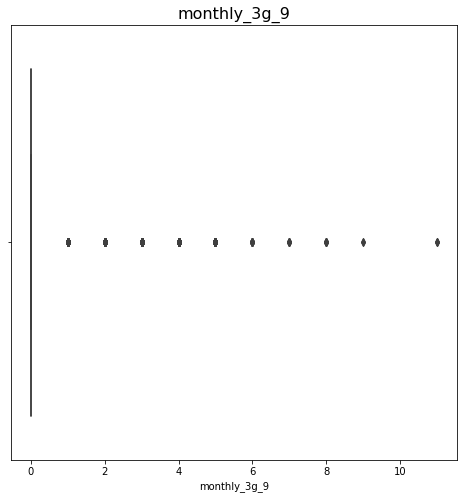

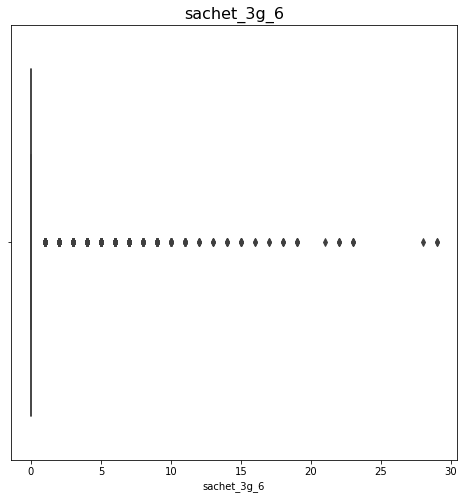

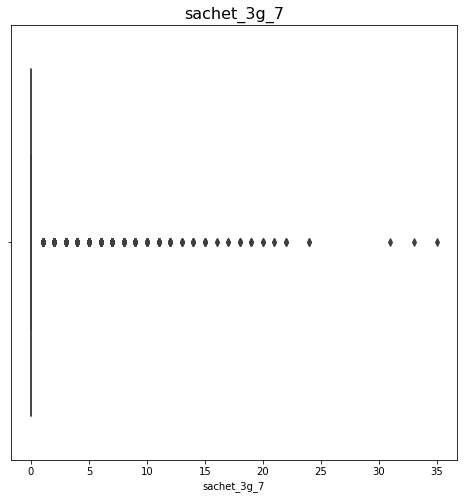

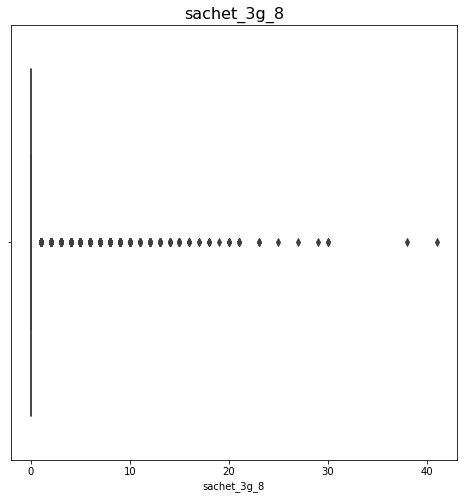

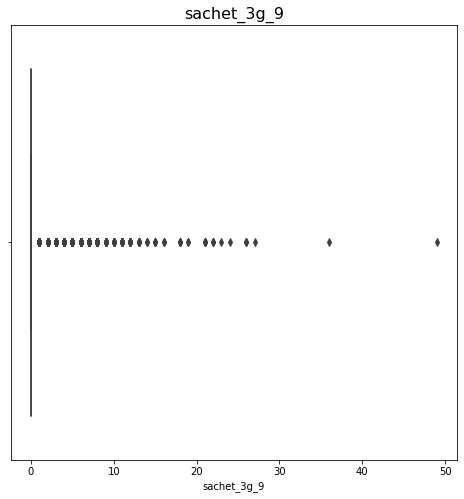

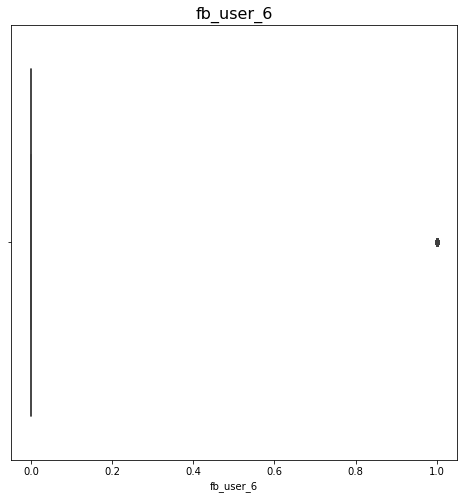

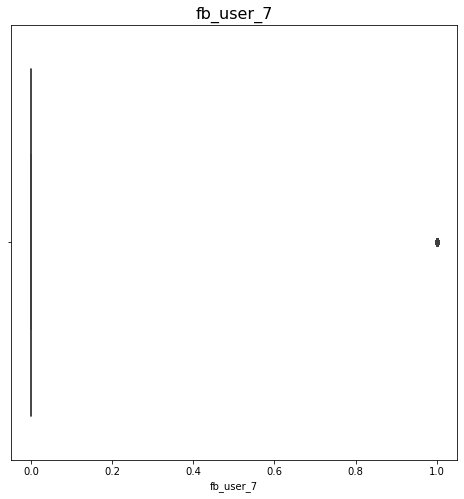

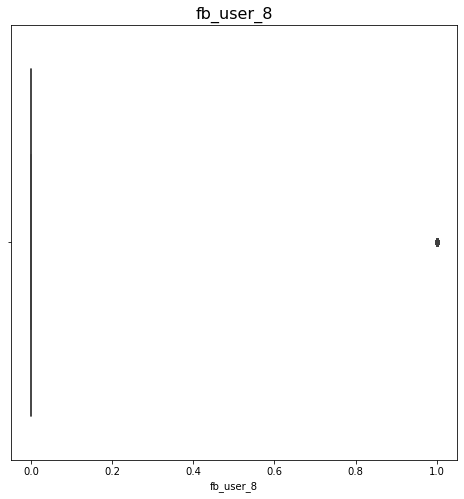

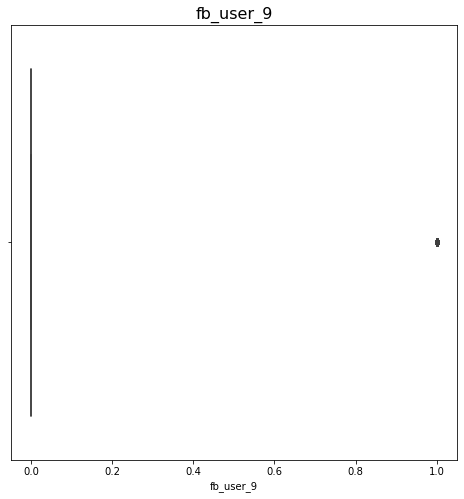

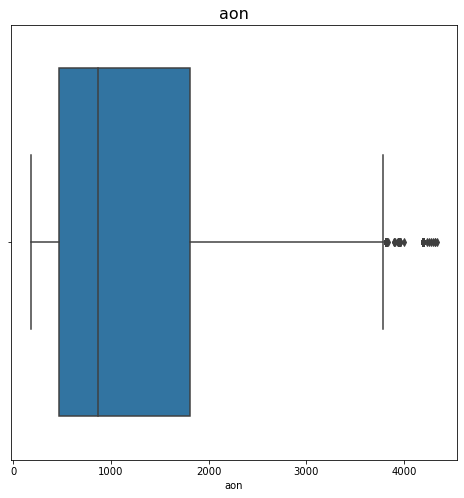

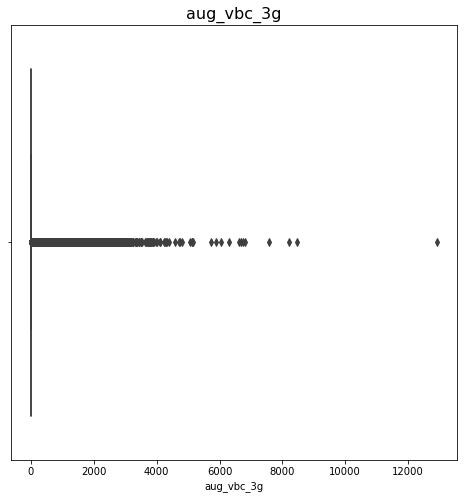

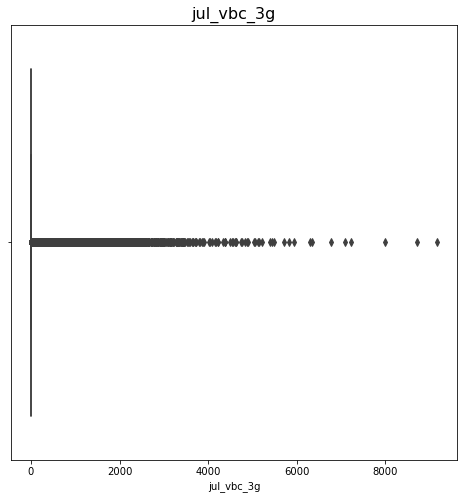

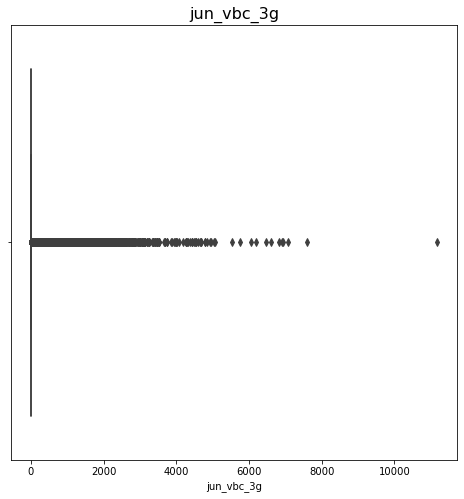

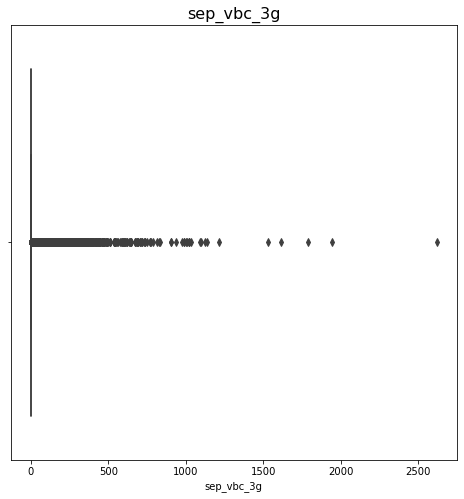

In [298]:
# Plot the bar plots for numerical columns

for i in list_num:
    if i != "circle_id":
        plt.figure(figsize=(8,8))
        plt.title(i, fontsize=16)
        sns.boxplot(x=i,data=churn_data)
        plt.show()

#### We can see that columns arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6 etc., have outliers

#### Multivarient Analysis

#### Checking the correlation between numerical variables

<AxesSubplot:>

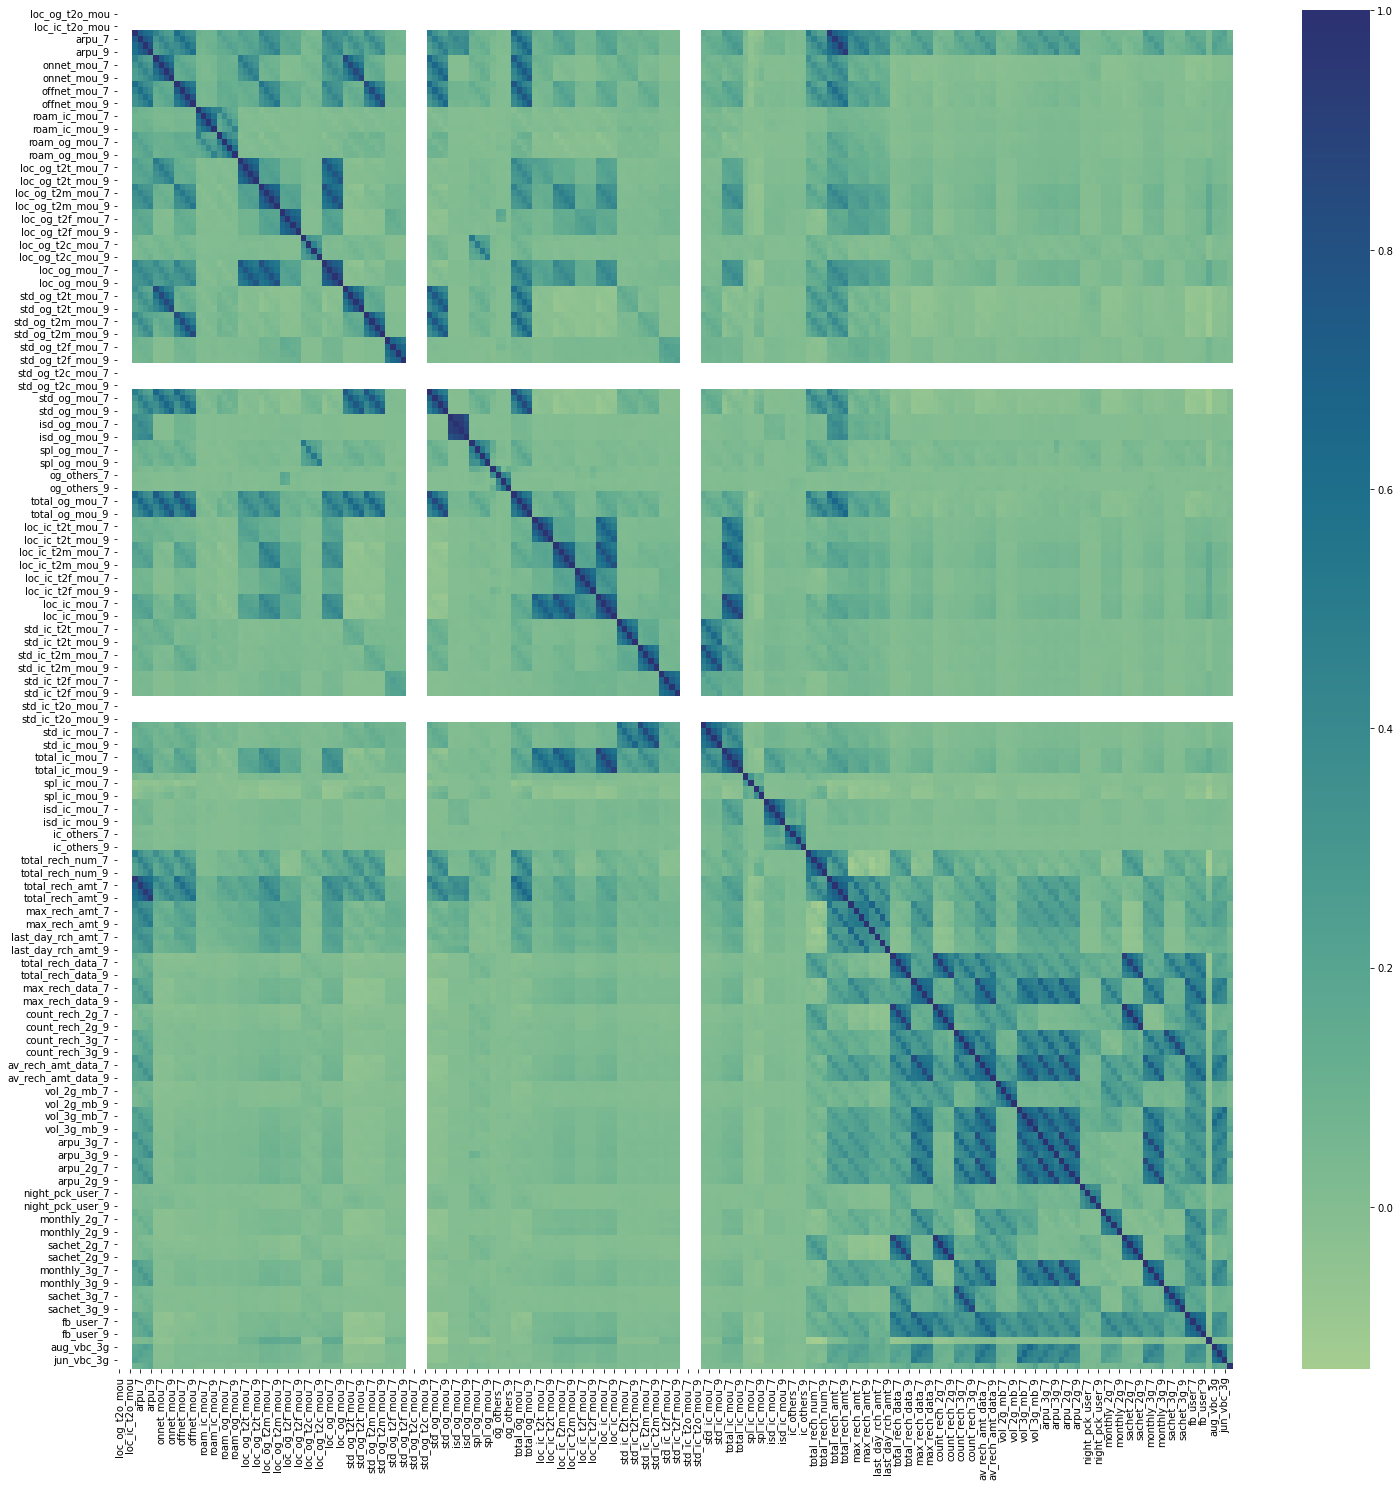

In [299]:
plt.figure(figsize=[25,25])
sns.heatmap(churn_data.corr(),cmap='crest')

#### We can see that some of the columns like arpu_3g and arpu_2g are correlated, but further intrepretation is difficult from this heatmap due to large number of variables

### Filter High Value Customers in the Good Phase(June and July)

In [300]:
df = churn_data.copy()

In [301]:
# Total amount per month = total recharge in that month * avegrage recharge amount in that month for each customer
df['total_amt_data_6']=df['total_rech_data_6']*df['av_rech_amt_data_6']
df['total_amt_data_7']=df['total_rech_data_7']*df['av_rech_amt_data_7']
df['total_amt_data_8']=df['total_rech_data_8']*df['av_rech_amt_data_8']
df['total_amt_data_9']=df['total_rech_data_9']*df['av_rech_amt_data_9']

In [302]:
#Get the total recharge in month June and July
df['total_rech_6']=df['total_amt_data_6']+df['total_rech_amt_6']
df['total_rech_7']=df['total_amt_data_7']+df['total_rech_amt_7']

In [303]:
#Get the average of both months
df['tota_avg_rech_amt_6_7']=(df['total_rech_6']+df['total_rech_7'])/2

In [304]:
#Drop the columns from which total amount for each month is derived
df.drop(['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'av_rech_amt_data_6',
              'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'], axis=1, inplace=True)

In [305]:
#Get the 70th percentile of this average data
avg_percent =np.quantile(df['tota_avg_rech_amt_6_7'],0.70)
avg_percent

478.0

> **We got value 478.0 as the 70th percentile, so we can consider all the customers whose total recharge during good phase above this range as high value customers**

In [306]:
#Deriving high value customer - filter tota_avg_rech_amt_6_7 greater than or equal to 70th percentile
hvc = df[df['tota_avg_rech_amt_6_7']>=avg_percent]
hvc.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_amt_data_6,total_amt_data_7,total_amt_data_8,total_amt_data_9,total_rech_6,total_rech_7,tota_avg_rech_amt_6_7
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000842753,0.0,0.0,0.0,197.385,214.816,213.803,21.100,34.31,32.33,0.00,29.84,96.31,91.735,0.00,87.29,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,11.91,11.61,0.00,11.26,41.03,40.43,0.00,39.12,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,65.11,63.685,0.00,61.84,0.00,0.00,0.00,0.00,3.95,3.635,0.00,2.50,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,11.64,11.09,0.00,8.41,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,15.69,15.74,0.16,15.66,56.49,57.08,4.13,56.61,0.88,0.93,1.15,0.96,92.16,92.55,5.44,91.64,0.00,0.00,0.00,0.00,2.03,2.04,0.00,1.74,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,5.89,5.96,0.00,5.38,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,

In [307]:
hvc.describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_amt_data_6,total_amt_data_7,total_amt_data_8,total_amt_data_9,total_rech_6,total_rech_7,tota_avg_rech_amt_6_7
count,30001.0,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.0,30001.0,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,3000

In [308]:
hvc.shape 

(30001, 211)

> **Therefore around 30K customers out of 1 lakh customers are high valued customer who are responsible for majority of the company's revenue**

### Derive the target variable churn

> **Based on total_ic_mou_9, total_og_mou_9, vol_2g_mb_9, vol_3g_mb_9 columns we can derive the churn variable, that is if the total incoming, outgoing, and 2g,3g data consumption is 0 then he likely to churn**

In [309]:
hvc['churn']=hvc.apply(lambda check: 1 if (check['total_ic_mou_9']==0 and check['total_og_mou_9']==0 and check['vol_2g_mb_9']==0 and check['vol_3g_mb_9']==0) else 0 , axis=1) 

In [310]:
#Imbalance check
hvc['churn'].value_counts(normalize=True)*100

0    91.863605
1     8.136395
Name: churn, dtype: float64

#### We have a highly imbalance target variable, hence we have to handle this imbalance

#### Dropping the insignificant columns

> We can drop the columns containing '9' as this is the churn month and will not be useful for prediction

In [311]:
#List of columns that contain '9'
col_9 = list(hvc.filter(regex='9$', axis=1).columns)
col_9

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_9',
 'total_amt_data_9']

In [312]:
#Dropping columns containing '9'
hvc.drop(columns=col_9,inplace=True)

In [313]:
hvc.describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_amt_data_6,total_amt_data_7,total_amt_data_8,total_rech_6,total_rech_7,tota_avg_rech_amt_6_7,churn
count,30001.0,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.0,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.0,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.0

#### We can see from the above describe function that some columns like loc_og_t2o_mou, std_og_t2o_mou, loc_ic_t2o_mou etc., are completely 0, hence we can drop them

In [314]:
#list of columns with max value 0
cols_0 =list(hvc.columns[hvc.max()==0])
cols_0

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [315]:
#Dropping columns with only zeros
hvc.drop(columns=cols_0,inplace=True)

In [316]:
hvc.shape

(30001, 153)

> Final dataset contains around 30K rows and 153 columns

### Handling outliers in the dataset

In [317]:
hvc_df = hvc.copy()

In [318]:
#Capping the outliers
column = list(hvc_df.columns)
for i in column:
    if i !='churn':
        q1=hvc_df[i].quantile(0.05)
        q3=hvc_df[i].quantile(0.95)
        iqr=q3-q1
        up_wis=q3+1.5*iqr
        low_wis=q1-1.5*iqr
        hvc_df[i]=np.where(hvc_df[i]>up_wis,up_wis, np.where(hvc_df[i]<low_wis,low_wis,hvc_df[i]))

In [319]:
hvc_df.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_amt_data_6,total_amt_data_7,total_amt_data_8,total_rech_6,total_rech_7,tota_avg_rech_amt_6_7,churn
count,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.0,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001

> We can see that the outliers are capped

### Data preparation

In [320]:
#Derive the X and y variables
y=hvc_df['churn']
X=hvc_df.drop('churn',axis=1)

#### Handling the class imbalance using SMOTE technique

In [321]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [322]:
y_res.value_counts()

1    27560
0    27560
Name: churn, dtype: int64

> Class Imbalance is now handled

In [323]:
#Train-Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=100)

In [324]:
#Scaling the data using standard scalar
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train[X_train.columns] = scalar.fit_transform(X_train[X_train.columns])
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_amt_data_6,total_amt_data_7,total_amt_data_8,total_rech_6,total_rech_7,tota_avg_rech_amt_6_7
28557,0.744267,0.915162,1.612547,0.321213,0.223244,0.498459,1.562262,2.506099,2.560933,-0.331414,-0.359655,-0.367435,-0.344288,-0.384293,-0.384066,2.118827,1.756860,1.521544,4.348036,7.058260,5.860080,1.033345,0.637759,0.543151,-0.376028,-0.373703,-0.317411,3.632616,5.405584,4.445641,-0.181573,-0.199048,0.146098,-0.107698,-0.338019,-0.107660,-0.266756,-0.265211,-0.221849,-0.201651,-0.357625,0.009235,-0.281007,-0.265880,-0.22467,-0.522899,-0.521118,-0.420983,-0.427448,0.0,0.0,1.310867,1.874813,1.987917,1.842280,1.352795,1.529992,4.277309,5.886401,4.570682,-0.177551,0.821598,0.446026,3.465290,4.406745,3.576469,2.711907,0.941123,2.668039,1.413142,0.134841,0.901417,2.425828,-0.292167,0.585672,1.945049,0.344378,1.445536,3.315752,3.714503,3.323841,-0.450666,-0.261024,-0.198257,0.122238,0.374076,1.278445,0.149564,0.438571,-0.260695,-0.406414,-0.838601,-0.338521,0.629135,1.305086,1.319395,1.524390,1.491962,3.032175,2.892078,3.065182,-0.337470,-0.663954,-0.631732,-0.243008,-0.496699,-0.493681,0.117688,-0.457005,-0.429082,-0.343176,-0.421499,-0.392711,-0.312293,-0.431322,-0.413078,-0.354441,-0.411081,-0.385270,-0.324641,-0.436866,-0.406960,-0.336074,0.0,0.0,0.0,-0.356440,-0.345847,-0.291909,-0.447925,-0.442686,0.166680,-0.387491,-0.365703,-0.305374,-0.338277,-0.318485,-0.236943,-0.967339,-0.916604,-0.700939,1.873508,-0.347403,-0.388769,-0.398908,-0.194181,-0.468828,-0.441957,-0.311181,-0.084162,0.219583,0.081580
42695,-1.353830,0.492721,-0.617468,-0.621961,-0.274058,-0.414036,-0.775864,1.718898,-0.186718,-0.311487,-0.359655,-0.290791,-0.260584,-0.384293,-0.311058,-0.514886,-0.246146,-0.401820,-0.669158,-0.446921,-0.530255,-0.385015,-0.038334,-0.332568,-0.367263,-0.223925,-0.062394,-0.676788,-0.418065,-0.545005,-0.487960,-0.180537,-0.280866,-0.514782,2.284292,0.191212,-0.266756,-0.265211,-0.221849,-0.652

In [325]:
X_test[X_test.columns] = scalar.fit_transform(X_test[X_test.columns])
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_amt_data_6,total_amt_data_7,total_amt_data_8,total_rech_6,total_rech_7,tota_avg_rech_amt_6_7
22210,-1.004005,0.063960,0.045672,-0.440068,-0.406185,-0.247735,-0.644940,-0.589823,-0.285680,-0.334078,-0.363083,-0.368946,-0.349386,-0.388144,-0.384674,0.254538,0.268362,0.442493,-0.517082,-0.414410,0.142898,3.429534,1.781113,1.448426,-0.37689,-0.373422,-0.314053,-0.146718,-0.124042,0.292277,-0.496432,-0.469881,-0.36006,-0.516259,-0.487785,-0.386794,-0.269087,-0.176158,0.312004,-0.663244,-0.620278,-0.467598,-0.280644,-0.262309,-0.215671,-0.487561,0.430842,-0.421283,-0.420076,0.0,0.0,-0.684318,-0.610426,-0.256056,0.846929,2.092331,2.525766,-0.500544,-0.648166,0.292416,0.192916,-0.129891,-0.022530,-0.071100,0.209556,0.983451,-0.466606,-0.436157,-0.339272,-0.514816,-0.485961,-0.397450,6.101987,5.645128,6.792307,1.445253,-0.158700,0.385803,0.237785,0.087105,0.881049,-0.448443,-0.257743,-0.204877,-0.333425,-0.320756,-0.263272,-0.331591,-0.303119,0.287067,-0.830332,-0.392887,-0.457719,-0.993956,0.109514,0.076857,-0.340471,-0.016010,0.208344,-0.421068,0.685842,0.915824,-0.661229,0.862147,1.113068,-0.492625,0.347545,0.132433,-0.457700,-0.431623,1.029744,-0.418880,-0.329229,-0.190826,-0.432504,1.399135,1.208211,-0.413201,0.212239,0.584801,-0.438634,-0.414530,0.224799,0.0,0.0,0.0,-0.359546,5.086102,-0.297536,-0.441582,-0.432546,0.183804,-0.391629,-0.372314,-0.313638,-0.333132,-0.311821,2.370136,-0.964737,1.152914,1.499542,1.215889,-0.349055,-0.391138,-0.39434,-0.188206,-0.469898,0.249151,0.489270,-0.894780,0.257766,-0.369408
48205,1.080880,-1.275658,-0.922859,-0.324193,-0.563789,-0.451714,2.659876,-0.652604,-0.554955,0.169531,0.527090,0.162217,0.025870,-0.228392,-0.372131,0.666269,-0.447957,-0.392560,6.738742,-0.561974,-0.477063,-0.386343,-0.374176,-0.333083,-0.37689,-0.373422,-0.314053,5.195664,-0.563445,-0.485194,-0.495689,-0.469881,-0.36006,-0.233198,-0.483824,-0.381608,-0.269087,-0.268526,-0.22297

### Building Intrepretable model using Logistic Regression

#### Using RFE for feature selection

In [326]:
# Top 20 Feature Selection Using RFE
logregg = LogisticRegression() # Create logisitc Regression object
rfe = RFE(logregg,n_features_to_select=20) # define the number of features
rfe.fit(X_train, y_train) # fit the data

RFE(estimator=LogisticRegression(), n_features_to_select=20)

In [327]:
rfe.support_

array([False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False,  True,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [328]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 63),
 ('arpu_7', False, 29),
 ('arpu_8', False, 24),
 ('onnet_mou_6', False, 120),
 ('onnet_mou_7', False, 84),
 ('onnet_mou_8', False, 71),
 ('offnet_mou_6', False, 23),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', False, 17),
 ('roam_ic_mou_6', False, 73),
 ('roam_ic_mou_7', False, 64),
 ('roam_ic_mou_8', False, 98),
 ('roam_og_mou_6', False, 121),
 ('roam_og_mou_7', False, 86),
 ('roam_og_mou_8', False, 15),
 ('loc_og_t2t_mou_6', False, 32),
 ('loc_og_t2t_mou_7', False, 58),
 ('loc_og_t2t_mou_8', False, 18),
 ('loc_og_t2m_mou_6', False, 20),
 ('loc_og_t2m_mou_7', True, 1),
 ('loc_og_t2m_mou_8', False, 72),
 ('loc_og_t2f_mou_6', False, 104),
 ('loc_og_t2f_mou_7', False, 52),
 ('loc_og_t2f_mou_8', False, 59),
 ('loc_og_t2c_mou_6', False, 89),
 ('loc_og_t2c_mou_7', False, 95),
 ('loc_og_t2c_mou_8', False, 74),
 ('loc_og_mou_6', False, 19),
 ('loc_og_mou_7', False, 6),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', False, 22),
 ('std_og_t2t_mou_7', False, 91),
 ('

In [329]:
col = X_train.columns[rfe.support_]
col

Index(['offnet_mou_7', 'loc_og_t2m_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_mou_8',
       'total_og_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8', 'total_ic_mou_7',
       'total_ic_mou_8', 'total_rech_num_7', 'total_rech_num_8',
       'count_rech_2g_7', 'sachet_2g_7', 'fb_user_8', 'sep_vbc_3g',
       'total_amt_data_6', 'total_rech_6'],
      dtype='object')

In [330]:
X_train.columns[~rfe.support_]

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_8', 'roam_ic_mou_6',
       'roam_ic_mou_7',
       ...
       'fb_user_6', 'fb_user_7', 'aon', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g', 'total_amt_data_7', 'total_amt_data_8', 'total_rech_7',
       'tota_avg_rech_amt_6_7'],
      dtype='object', length=132)

In [331]:
rfe_cols = X.columns[rfe.support_]
rfe_cols

Index(['offnet_mou_7', 'loc_og_t2m_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_mou_8',
       'total_og_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8', 'total_ic_mou_7',
       'total_ic_mou_8', 'total_rech_num_7', 'total_rech_num_8',
       'count_rech_2g_7', 'sachet_2g_7', 'fb_user_8', 'sep_vbc_3g',
       'total_amt_data_6', 'total_rech_6'],
      dtype='object')

### Model 1

#### Assessing the model with StatsModels

In [332]:
import statsmodels.api as sm

In [333]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38584
Model:                            GLM   Df Residuals:                    38563
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15425.
Date:                Tue, 01 Nov 2022   Deviance:                       30851.
Time:                        22:44:40   Pearson chi2:                 2.87e+07
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2672      0.018    -15.049      0.000      -0.302      -0.232
offnet_mou_7         1.3272      0.091     14.638      0.000       1.149       1.505
loc_og_t2m_mou_7    -0.6890      0.045    -15.467      0.000      -0.776      -0.602
loc_og_mou_8         2.9873      0.210     14.245      0.000       2.576       3.398
std_og_t2t_mou_8    -0.8741      0.081    -10.792      0.000      -1.033      -0.715
std_og_t2m_mou_7    -0.9374      0.082    -11.425      0.000      -1.098      -0.777
std_og_t2m_mou_8    -1.0958      0.082    -13.366      0.000      -1.256      -0.935
std_og_mou_8         7.6154      0.421     18.084      0.000       6.790       8.441
total_og_mou_8      -7.7282      0.467    -16.540      0.000      -8.644      -6.812
loc_ic_mou_8         1.1741      0.145      8.119      0.000       0.891       1.457
std_ic_mou_8         0.3571      0.046      7.805      0.000       0.267       0.447
total_ic_mou_7       0.6904      0.036     19.057      0.000       0.619       0.761
total_ic_mou_8      -3.0659      0.180    -17.062      0.000      -3.418      -2.714
total_rech_num_7     0.5363      0.026     20.682      0.000       0.485       0.587
total_rech_num_8    -0.6078      0.028    -21.412      0.000      -0.663      -0.552
count_rech_2g_7     -0.8821      0.107     -8.226      0.000      -1.092      -0.672
sachet_2g_7          0.8836      0.106      8.326      0.000       0.676       1.092
fb_user_8           -0.6601      0.017    -38.350      0.000      -0.694      -0.626
sep_vbc_3g          -0.6780      0.048    -14.266      0.000      -0.771      -0.585
total_amt_data_6    -0.4728      0.037    -12.616      0.000      -0.546      -0.399
total_rech_6         0.5490      0.036     15.280      0.000       0.479       0.619
====================================================================================
"""

In [334]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

28557    0.002873
42695    0.858475
5781     0.010867
14891    0.303430
20392    0.447962
4830     0.635731
35667    0.686425
14154    0.308845
27402    0.403624
19590    0.537206
dtype: float64

In [335]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00287284, 0.85847507, 0.01086667, 0.30342998, 0.44796151,
       0.6357314 , 0.68642526, 0.3088448 , 0.40362413, 0.53720551])

#### Creating a dataframe with the actual churn and the predicted probabilities

In [336]:
y_train_pred_final = pd.DataFrame({'Churn_val':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

,Churn_val,Churn_Prob
0,0,0.002873
1,1,0.858475
2,0,0.010867
3,0,0.303430
4,0,0.447962


#### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [337]:
y_train_pred_final['Predicted'] = y_train_pred_final["Churn_Prob"].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn_val,Churn_Prob,Predicted
0,0,0.002873,0
1,1,0.858475,1
2,0,0.010867,0
3,0,0.303430,0
4,0,0.447962,0


In [338]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final["Churn_val"], y_train_pred_final["Predicted"])
print(confusion)

[[16113  3207]
 [ 3221 16043]]


In [339]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Churn_val"], y_train_pred_final["Predicted"]))

0.8334024466099937


### Checking VIFs

In [340]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,std_og_mou_8,140.78
7,total_og_mou_8,94.55
14,count_rech_2g_7,49.61
15,sachet_2g_7,48.41
0,offnet_mou_7,24.22
2,loc_og_mou_8,24.17
3,std_og_t2t_mou_8,22.58
5,std_og_t2m_mou_8,22.50
4,std_og_t2m_mou_7,20.94
11,total_ic_mou_8,16.81


In [341]:
# Dropping the column below as High VIF
col = col.drop(['std_og_t2t_mou_8','total_og_mou_8','count_rech_2g_7','sachet_2g_7','offnet_mou_7'], 1)
col

Index(['loc_og_t2m_mou_7', 'loc_og_mou_8', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8',
       'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_num_7',
       'total_rech_num_8', 'fb_user_8', 'sep_vbc_3g', 'total_amt_data_6',
       'total_rech_6'],
      dtype='object')

### Model 2

In [342]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38584
Model:                            GLM   Df Residuals:                    38568
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15779.
Date:                Tue, 01 Nov 2022   Deviance:                       31558.
Time:                        22:44:42   Pearson chi2:                 7.75e+10
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.3098      0.018    -17.702      0.000      -0.344      -0.276
loc_og_t2m_mou_7    -0.1748      0.026     -6.670      0.000      -0.226      -0.123
loc_og_mou_8        -0.4236      0.035    -12.060      0.000      -0.492      -0.355
std_og_t2m_mou_7     0.2046      0.027      7.636      0.000       0.152       0.257
std_og_t2m_mou_8    -0.2228      0.029     -7.688      0.000      -0.280      -0.166
std_og_mou_8        -0.1918      0.022     -8.668      0.000      -0.235      -0.148
loc_ic_mou_8         3.0051      0.111     27.013      0.000       2.787       3.223
std_ic_mou_8         0.8922      0.037     24.105      0.000       0.820       0.965
total_ic_mou_7       0.6981      0.036     19.459      0.000       0.628       0.768
total_ic_mou_8      -5.3765      0.138    -39.056      0.000      -5.646      -5.107
total_rech_num_7     0.5418      0.025     22.037      0.000       0.494       0.590
total_rech_num_8    -0.6631      0.028    -23.808      0.000      -0.718      -0.609
fb_user_8           -0.6902      0.016    -42.737      0.000      -0.722      -0.659
sep_vbc_3g          -0.6717      0.047    -14.276      0.000      -0.764      -0.579
total_amt_data_6    -0.5378      0.033    -16.130      0.000      -0.603      -0.472
total_rech_6         0.6384      0.032     19.745      0.000       0.575       0.702
====================================================================================
"""

In [343]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,total_ic_mou_8,16.33
5,loc_ic_mou_8,12.11
13,total_amt_data_6,4.30
14,total_rech_6,3.92
3,std_og_t2m_mou_8,3.57
7,total_ic_mou_7,2.87
4,std_og_mou_8,2.77
6,std_ic_mou_8,2.65
10,total_rech_num_8,2.64
1,loc_og_mou_8,2.46


In [344]:
# Dropping the column "total_ic_mou_8" as it has high VIF of 16.33
col = col.drop(['total_ic_mou_8'], 1)
col

Index(['loc_og_t2m_mou_7', 'loc_og_mou_8', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8',
       'total_ic_mou_7', 'total_rech_num_7', 'total_rech_num_8', 'fb_user_8',
       'sep_vbc_3g', 'total_amt_data_6', 'total_rech_6'],
      dtype='object')

### Model 3

In [345]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38584
Model:                            GLM   Df Residuals:                    38569
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16824.
Date:                Tue, 01 Nov 2022   Deviance:                       33648.
Time:                        22:44:43   Pearson chi2:                 1.79e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2934      0.017    -17.172      0.000      -0.327      -0.260
loc_og_t2m_mou_7    -0.1183      0.025     -4.694      0.000      -0.168      -0.069
loc_og_mou_8        -0.6013      0.037    -16.385      0.000      -0.673      -0.529
std_og_t2m_mou_7     0.2149      0.027      8.005      0.000       0.162       0.267
std_og_t2m_mou_8    -0.2458      0.030     -8.297      0.000      -0.304      -0.188
std_og_mou_8        -0.2380      0.023    -10.469      0.000      -0.283      -0.193
loc_ic_mou_8        -0.9337      0.040    -23.623      0.000      -1.011      -0.856
std_ic_mou_8        -0.3280      0.020    -16.025      0.000      -0.368      -0.288
total_ic_mou_7       0.1688      0.027      6.181      0.000       0.115       0.222
total_rech_num_7     0.5963      0.024     24.414      0.000       0.548       0.644
total_rech_num_8    -0.8941      0.028    -31.675      0.000      -0.949      -0.839
fb_user_8           -0.8067      0.016    -51.633      0.000      -0.837      -0.776
sep_vbc_3g          -0.7381      0.049    -15.203      0.000      -0.833      -0.643
total_amt_data_6    -0.4542      0.032    -14.313      0.000      -0.516      -0.392
total_rech_6         0.6404      0.031     20.530      0.000       0.579       0.702
====================================================================================
"""

In [346]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,total_amt_data_6,4.30
13,total_rech_6,3.92
3,std_og_t2m_mou_8,3.57
4,std_og_mou_8,2.77
5,loc_ic_mou_8,2.74
7,total_ic_mou_7,2.63
9,total_rech_num_8,2.61
1,loc_og_mou_8,2.45
2,std_og_t2m_mou_7,2.31
8,total_rech_num_7,2.21


> **We can consider Model 3 as the final model as the p-values are less than 0.05 and VIFs are less than 5**

In [347]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

28557    0.001715
42695    0.863855
5781     0.024226
14891    0.400967
20392    0.516936
4830     0.715405
35667    0.800847
14154    0.405289
27402    0.504152
19590    0.112393
dtype: float64

In [348]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00171537, 0.86385531, 0.02422566, 0.40096745, 0.51693595,
       0.71540469, 0.80084701, 0.40528889, 0.50415231, 0.11239267])

In [349]:
y_train_pred_final = pd.DataFrame({'Churn_val':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

,Churn_val,Churn_Prob
0,0,0.001715
1,1,0.863855
2,0,0.024226
3,0,0.400967
4,0,0.516936


In [350]:
y_train_pred_final['Predicted'] = y_train_pred_final["Churn_Prob"].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn_val,Churn_Prob,Predicted
0,0,0.001715,0
1,1,0.863855,1
2,0,0.024226,0
3,0,0.400967,0
4,0,0.516936,1


### Model Evaluation

In [351]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final["Churn_val"], y_train_pred_final["Predicted"])
print(confusion)

[[15486  3834]
 [ 3299 15965]]


In [352]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Churn_val"], y_train_pred_final["Predicted"]))

0.8151306240928883


### Plotting the ROC Curve

In [353]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [354]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final["Churn_val"], y_train_pred_final["Churn_Prob"], drop_intermediate = False )

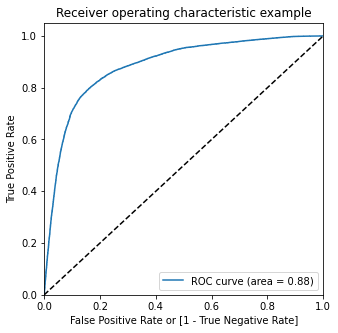

In [355]:
draw_roc(y_train_pred_final["Churn_val"], y_train_pred_final["Churn_Prob"])

### Finding Optimal Cutoff Point
#### Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [356]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final["Churn_Prob"].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn_val,Churn_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.001715,0,1,0,0,0,0,0,0,0,0,0
1,1,0.863855,1,1,1,1,1,1,1,1,1,1,0
2,0,0.024226,0,1,0,0,0,0,0,0,0,0,0
3,0,0.400967,0,1,1,1,1,1,0,0,0,0,0
4,0,0.516936,1,1,1,1,1,1,1,0,0,0,0


In [357]:
#Calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Churn_val"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.499274  1.000000  0.000000
0.1   0.1  0.655401  0.974512  0.337215
0.2   0.2  0.722527  0.955409  0.490321
0.3   0.3  0.766820  0.916684  0.617391
0.4   0.4  0.800850  0.872872  0.729037
0.5   0.5  0.815131  0.828748  0.801553
0.6   0.6  0.817515  0.779070  0.855849
0.7   0.7  0.803960  0.706084  0.901553
0.8   0.8  0.730510  0.512718  0.947671
0.9   0.9  0.583947  0.181790  0.984938


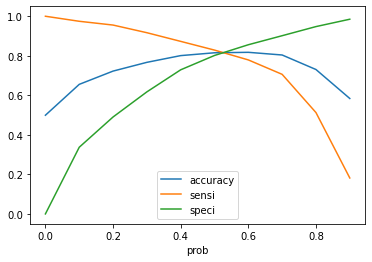

In [358]:
#Plot of accuracy,sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### Prediction on test data

In [359]:
X_test = X_test[col]
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

22210    0.068873
48205    0.826020
28405    0.807172
52450    0.847633
41216    0.709254
39752    0.654228
50275    0.766825
47780    0.864327
8064     0.289117
48850    0.899835
dtype: float64

In [360]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
22210,0.068873
48205,0.826020
28405,0.807172
52450,0.847633
41216,0.709254


In [361]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [362]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [363]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,churn,0
0,0,0.068873
1,1,0.826020
2,1,0.807172
3,1,0.847633
4,1,0.709254


In [364]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob','churn':'Churn_val'})
y_pred_final.head()

,Churn_val,Churn_Prob
0,0,0.068873
1,1,0.826020
2,1,0.807172
3,1,0.847633
4,1,0.709254


In [365]:
y_pred_final['final_predicted'] = y_pred_final['Churn_Prob'].map(lambda x: 1 if x > 0.5 else 0)

In [366]:
y_pred_final.head()

,Churn_val,Churn_Prob,final_predicted
0,0,0.068873,0
1,1,0.826020,1
2,1,0.807172,1
3,1,0.847633,1
4,1,0.709254,1


In [367]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final['Churn_val'], y_pred_final.final_predicted)

0.8221456216739236

In [368]:
# Top predictors
abs(res.params).sort_values(ascending=False)

loc_ic_mou_8        0.933664
total_rech_num_8    0.894053
fb_user_8           0.806748
sep_vbc_3g          0.738067
total_rech_6        0.640432
loc_og_mou_8        0.601307
total_rech_num_7    0.596254
total_amt_data_6    0.454208
std_ic_mou_8        0.328033
const               0.293415
std_og_t2m_mou_8    0.245823
std_og_mou_8        0.237986
std_og_t2m_mou_7    0.214868
total_ic_mou_7      0.168752
loc_og_t2m_mou_7    0.118350
dtype: float64

> The above are the top predictors as per logistic regression model

### Logistic Regression model metrics

- Train accuracy - 0.81
- Test accuracy - 0.82
- Optimal Cutoff - 0.5
- AUC-ROC - 0.88

### Building High Performance models

1. Decision Tree
2. Random Forest
3. Regularization model(ridge)
4. Boosting(Adaboost)

#### Applying PCA

In [369]:
#Train-Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=100)

In [370]:
X_train.shape

(38584, 152)

In [371]:
X_test.shape

(16536, 152)

In [372]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit_transform(X_train)

array([[-8.02960281e+02,  2.31290398e+03, -1.85064347e+03, ...,
        -3.77871017e-14,  1.08474518e-13,  6.61080889e-14],
       [-6.80335796e+02, -1.15967241e+02, -1.19452261e+03, ...,
        -1.67605843e-14,  1.01628680e-13,  3.80050411e-14],
       [ 1.10778961e+02,  8.10769361e+01, -5.38499334e+02, ...,
        -7.46666288e-14, -1.63842547e-14, -8.43622377e-14],
       ...,
       [ 3.52241884e+02, -1.36910586e+03,  2.23954364e+02, ...,
         3.20388228e-15,  3.46966748e-15, -2.34773457e-15],
       [-6.12357325e+02, -2.03323904e+03,  7.69830944e+02, ...,
        -3.43567731e-16,  2.79998617e-15, -2.12416749e-16],
       [-1.48602245e+03,  8.35499813e+02,  9.54899696e+02, ...,
        -2.77443724e-16, -1.50428136e-15, -2.92269400e-15]])

In [373]:
pca.components_

array([[ 5.07340276e-03,  1.97962597e-02,  2.65527024e-02, ...,
         3.48773493e-01,  4.15408593e-01,  3.86846509e-01],
       [ 1.44363746e-01,  1.64388091e-01,  1.20215083e-01, ...,
         1.62600704e-01,  2.32089365e-01,  1.98593226e-01],
       [ 1.37225640e-01, -1.09595219e-01, -1.52898367e-01, ...,
         5.04625160e-01, -3.33795450e-01,  8.76478520e-02],
       ...,
       [-0.00000000e+00, -1.29064325e-18,  1.51976282e-18, ...,
        -3.63795092e-19,  2.15425834e-19,  1.07225343e-18],
       [-0.00000000e+00,  5.04860912e-19, -3.41010796e-19, ...,
        -3.21242611e-19, -6.98989146e-19,  7.59433939e-19],
       [-0.00000000e+00,  2.10451059e-18,  1.70049051e-18, ...,
        -1.16955686e-18, -4.99995059e-19,  9.24903526e-19]])

In [374]:
#Looking at the explained variance ratio for each component
pca.explained_variance_ratio_

array([2.61127119e-01, 2.09135160e-01, 9.30064722e-02, 7.40275468e-02,
       5.21770056e-02, 4.73803386e-02, 4.61334889e-02, 3.67600501e-02,
       2.92662066e-02, 2.28895227e-02, 2.06472130e-02, 1.29886516e-02,
       1.01237609e-02, 8.80394981e-03, 8.01014836e-03, 7.67127175e-03,
       6.69880042e-03, 5.70123131e-03, 5.17379732e-03, 4.48512997e-03,
       3.79957327e-03, 3.55333621e-03, 2.33232522e-03, 2.23917582e-03,
       2.09050323e-03, 1.90972457e-03, 1.75421105e-03, 1.59312691e-03,
       1.37056426e-03, 1.28412121e-03, 1.21662510e-03, 1.13478209e-03,
       1.12873545e-03, 9.94959205e-04, 9.20566636e-04, 7.91017019e-04,
       7.02423084e-04, 6.52840861e-04, 5.43958851e-04, 4.91457670e-04,
       4.55265138e-04, 4.40044388e-04, 4.10813976e-04, 3.66326976e-04,
       3.36818937e-04, 3.25979105e-04, 3.16027616e-04, 3.01239196e-04,
       2.98381338e-04, 2.89095767e-04, 2.72212504e-04, 2.56134913e-04,
       2.36878539e-04, 2.30634049e-04, 2.11521566e-04, 1.98815075e-04,
      

In [375]:
#Making a scree plot for the explained variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)

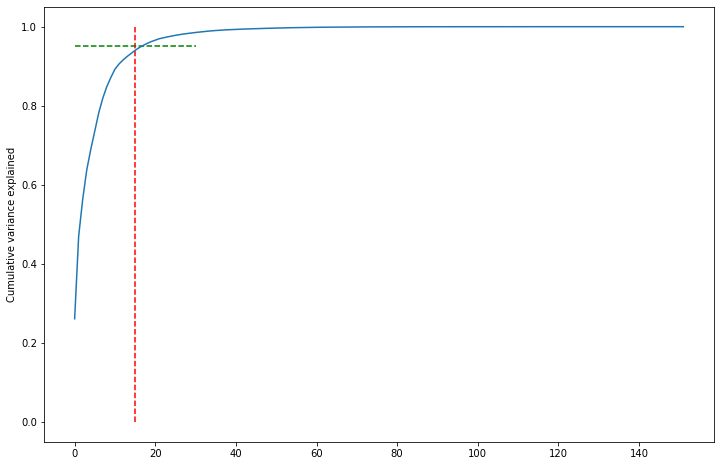

In [376]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [377]:
#Perform PCA with 17 components
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=17)
X_train_pca = pca_final.fit_transform(X_train)
X_train_pca.shape

(38584, 17)

In [378]:
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(16536, 17)

In [379]:
y_train_pca = y_train
y_test_pca = y_test

> We have reduced the number of features from 152 to 17 through PCA

### Building Decision Tree model

In [380]:
X_train, X_test, y_train, y_test = train_test_split(X_train_pca, y_train_pca, train_size=0.7, random_state=42)

In [381]:
from sklearn.tree import DecisionTreeClassifier

# First classifier
intial_dt = DecisionTreeClassifier(random_state=42, max_depth=10)
intial_dt.fit(X_train, y_train)

# Train Accuracy
y_train_pred = intial_dt.predict(X_train)
print(f'Train accuracy : {metrics.accuracy_score(y_train, y_train_pred)}')

y_test_pred = intial_dt.predict(X_test)

# Print the report on test data
print(metrics.classification_report(y_test, y_test_pred))

Train accuracy : 0.887033471563981
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      5786
           1       0.82      0.85      0.84      5790

    accuracy                           0.83     11576
   macro avg       0.83      0.83      0.83     11576
weighted avg       0.83      0.83      0.83     11576



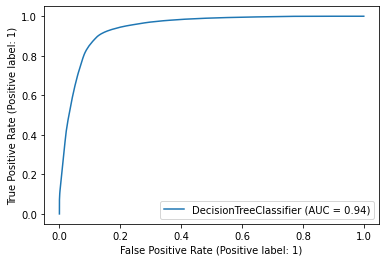

In [382]:
# Plot ROC curve True vs False positive rate
from sklearn.metrics import plot_roc_curve
plot_roc_curve(intial_dt, X_train, y_train, drop_intermediate=False)
plt.show()

In [383]:
# Performing the Hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(random_state=42)

# Define Grid
params = {
    "max_depth": [2, 3, 5, 10, 20, 30, 40, 50, 100],
    "min_samples_leaf": [5, 10, 20, 50, 100, 250, 500, 800, 1000],
    "min_samples_leaf" : [1, 5, 10, 25, 50, 100]
}

grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

# Perform gridsearch
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 54 candidates, totalling 216 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30, 40, 50, 100],
                         'min_samples_leaf': [1, 5, 10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [384]:
#Best Score
grid_search.best_score_

0.8422689573459716

In [385]:
# Best estimator
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=20, random_state=42)

In [386]:
y_train_pred = dt_best.predict(X_train)
y_test_pred = dt_best.predict(X_test)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      5786
           1       0.84      0.88      0.86      5790

    accuracy                           0.85     11576
   macro avg       0.86      0.85      0.85     11576
weighted avg       0.86      0.85      0.85     11576



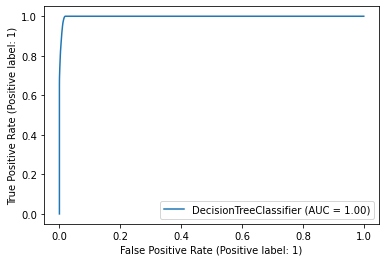

In [387]:
# Plot ROC curve True vs False positive rate
plot_roc_curve(dt_best, X_train, y_train)
plt.show()

### Decision tree model metrics

- Train accuracy - 0.84
- Test accuracy - 0.85
- AUC-ROC - 1.00

### Building Random Forest model

In [388]:
from sklearn.ensemble import RandomForestClassifier

In [389]:
#Train test split by considering features from PCA
X_train, X_test, y_train, y_test = train_test_split(X_train_pca, y_train_pca, train_size=0.7, random_state=42)

In [390]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [391]:
#Define Grid
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [392]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits
Wall time: 2min 24s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [393]:
#Best Score
grid_search.best_score_

0.8846638033175356

In [394]:
#Best Estimator
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

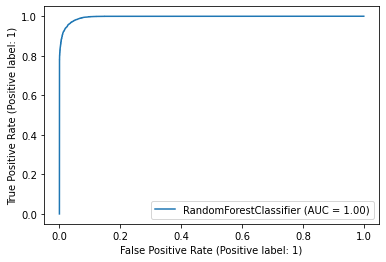

In [395]:
#Plot ROC curve True vs False positive rate
plot_roc_curve(rf_best, X_train, y_train)
plt.show()

#### Build Random forest model with best params

In [396]:
final_rf = RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)
print(f"Final model:\n{final_rf}")

Final model:
RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)


In [397]:
# Fitting the final model on the data
final_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

In [398]:
y_train_pred = final_rf.predict(X_train)
y_test_pred = final_rf.predict(X_test)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      5786
           1       0.89      0.90      0.89      5790

    accuracy                           0.89     11576
   macro avg       0.89      0.89      0.89     11576
weighted avg       0.89      0.89      0.89     11576



### Random Forest model metrics

- Train accuracy - 0.88
- Test accuracy - 0.89

### Building Regularisation model using Ridge regression as we have more features

In [399]:
from sklearn.linear_model import Ridge

In [400]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=100)

In [401]:
num_cols = list(X_train.select_dtypes(include=['int64', 'float64']).columns)
num_cols

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

In [402]:
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [403]:
# Applying Ridge Regression with varying the hyperparameter 'lambda'
params = {'alpha': 
          [0.0001,0.001 ,0.01 ,0.05, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0 
           ,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10,20,50,100,500,1000]}

ridge = Ridge()
# cross validation
ridgeCV = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
ridgeCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [404]:
# View the optimal value of alpha
ridgeCV.best_params_

{'alpha': 0.1}

#### We can see the optimal value of alpha for ridge regression in 0.1

In [405]:
# View the cross validation result
ridgeCV.cv_results_

{'mean_fit_time': array([0.76130486, 0.78746276, 0.76973524, 0.54201393, 0.56151705,
        0.54629674, 0.53559041, 0.47780032, 0.56764965, 0.48035822,
        0.52957482, 0.50329747, 0.48478074, 0.55315895, 0.50329261,
        0.48244905, 0.53370552, 0.5319304 , 0.52313147, 0.47849979,
        0.52597113, 0.52184057, 0.57156477, 0.47145729, 0.52373719,
        0.50497713, 0.46268001, 0.41000285]),
 'std_fit_time': array([0.05110919, 0.03187475, 0.01858851, 0.1433458 , 0.09275801,
        0.08083094, 0.09691018, 0.01288537, 0.0767362 , 0.07719408,
        0.0672944 , 0.02747377, 0.05100605, 0.01943376, 0.02576193,
        0.03614279, 0.07598979, 0.03990066, 0.02633722, 0.06567867,
        0.03789608, 0.05114602, 0.11281478, 0.02732579, 0.05259285,
        0.03435319, 0.0262958 , 0.02400539]),
 'mean_score_time': array([0.01976771, 0.01715093, 0.02086396, 0.02712889, 0.02479291,
        0.01902232, 0.02514858, 0.03562698, 0.02692909, 0.03026943,
        0.02884202, 0.02000694, 0.023772

In [406]:
#Building model with alpha as 0.1
ridge = Ridge(alpha=0.1)

In [407]:
ridge.fit(X_train, y_train)# fit the model

Ridge(alpha=0.1)

In [408]:
ridge.coef_ #view the coefficients

array([ 2.74958846e-02,  1.81933768e-02, -1.02172517e-02,  2.64761018e-02,
        1.23084447e-02,  1.08677563e-01,  3.86605608e-02,  7.26844675e-02,
        8.39109621e-02, -6.29300271e-03,  1.78530668e-02,  3.97257097e-03,
       -4.29261061e-03, -3.50917143e-03,  2.05410980e-02, -1.64357593e-02,
       -4.22133677e-03, -4.89355569e-02, -3.40316644e-02, -4.67849523e-02,
       -3.47637111e-02, -2.81794034e-03, -1.82521608e-02,  6.47125902e-03,
       -6.36518200e-03, -6.86907949e-03,  8.79093730e-03,  3.67127282e-02,
        1.31498274e-02,  1.50767910e-01,  4.53138146e-02,  1.90617216e-02,
       -2.22098146e-01,  2.77832670e-02, -1.94694181e-02, -2.00197989e-01,
        1.74083086e-03,  3.71894579e-03, -2.10788303e-02, -8.88428104e-03,
       -2.88168692e-02,  4.73198402e-01,  2.47322668e-03,  6.22527876e-03,
        1.30202984e-02,  2.24789640e-03,  7.69496527e-03, -7.91221264e-04,
       -6.03000460e-03,  0.00000000e+00,  0.00000000e+00, -7.88195971e-02,
        1.28547284e-02, -

In [409]:
# Make predictions on test and train datasets
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [410]:
# Creating a function for evaluating the metrics 
def eval_metrics(y_train, y_train_pred, y_test, y_pred):
    
    ## R-squared values of train and test data
    print("r2 score(Train) =", '%.2f' % r2_score(y_train, y_train_pred))
    print("r2 score(Test) =", '%.2f' % r2_score(y_test, y_pred))

    # Root Mean Squared Error for train and test data
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_pred)
    rmse_train = mse_train**0.5
    rmse_test = mse_test**0.5
    print("RMSE(Train) =", '%.2f' % rmse_train) 
    print("RMSE(Test) =", '%.2f' % rmse_test)

In [411]:
from sklearn.metrics import r2_score,mean_squared_error

In [412]:
eval_metrics(y_train, y_train_pred, y_test, y_pred) # Evaluate r2 score and RMSE on train and test

r2 score(Train) = 0.49
r2 score(Test) = 0.49
RMSE(Train) = 0.36
RMSE(Test) = 0.36


In [413]:
ridgeCV_results= pd.DataFrame(ridgeCV.cv_results_) #Add the results to a dataframe
ridgeCV_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.761305,0.051109,0.019768,0.003128,0.0001,{'alpha': 0.0001},-0.286873,-0.292605,-0.288416,-0.290824,-0.291829,-0.290109,0.002146,6,-0.289638,-0.287551,-0.289001,-0.288102,-0.287994,-0.288457,0.000755
1,0.787463,0.031875,0.017151,0.002484,0.001,{'alpha': 0.001},-0.286873,-0.292605,-0.288416,-0.290824,-0.291829,-0.290109,0.002146,5,-0.289638,-0.287551,-0.289001,-0.288102,-0.287994,-0.288457,0.000755
2,0.769735,0.018589,0.020864,0.001746,0.01,{'alpha': 0.01},-0.286874,-0.292605,-0.288416,-0.290823,-0.291829,-0.290109,0.002146,4,-0.289638,-0.287551,-0.289001,-0.288103,-0.287994,-0.288458,0.000755
3,0.542014,0.143346,0.027129,0.006621,0.05,{'alpha': 0.05},-0.286875,-0.292607,-0.288415,-0.290819,-0.291829,-0.290109,0.002146,2,-0.289639,-0.287551,-0.289002,-0.288104,-0.287995,-0.288458,0.000755
4,0.561517,0.092758,0.024793,0.009180,0.1,{'alpha': 0.1},-0.286877,-0.292609,-0.288414,-0.290815,-0.291830,-0.290109,0.002146,1,-0.289640,-0.287551,-0.289002,-0.288106,-0.287995,-0.288459,0.000755


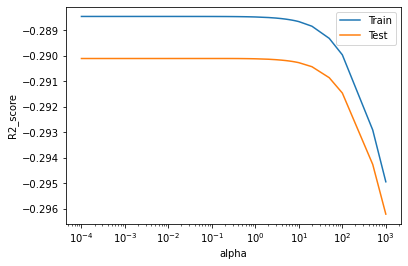

In [414]:
## Plotting R2 score vs alpha values
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_train_score'], label='Train')
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

In [415]:
#Building model with alpha as 50
ridge = Ridge(alpha=50)

In [416]:
ridge.fit(X_train, y_train)# fit the model

Ridge(alpha=50)

In [417]:
# Make predictions on test and train datasets
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [418]:
eval_metrics(y_train, y_train_pred, y_test, y_pred) # Evaluate r2 score and RMSE on train and test

r2 score(Train) = 0.49
r2 score(Test) = 0.49
RMSE(Train) = 0.36
RMSE(Test) = 0.36


### Building AdaBoost model

In [419]:
from sklearn.ensemble import AdaBoostClassifier

In [420]:
X_train, X_test, y_train, y_test = train_test_split(X_train_pca, y_train_pca, train_size=0.7, random_state=42)

In [421]:
# Create a shallow tree as weak learner
shallow_tree = DecisionTreeClassifier(max_depth=2, random_state = 100)

# Fit the shallow decision tree 
shallow_tree.fit(X_train, y_train)

# Test error
y_pred = shallow_tree.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
score

0.6962681409813407

In [422]:
# Adaboost with shallow tree as base estimator

# Define the number of trees to be used or estimators
estimators = list(range(1, 150, 10))

# Loop through the estimators
adaboost_scores = []
for num_est in estimators:
    adaboost = AdaBoostClassifier(base_estimator=shallow_tree, n_estimators = num_est, random_state=25)
    
    adaboost.fit(X_train, y_train)
    y_pred = adaboost.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    adaboost_scores.append(score)

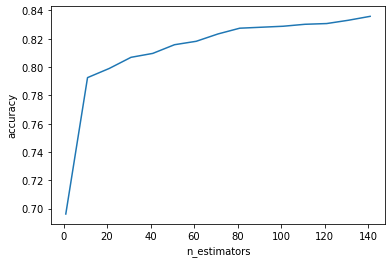

In [423]:
# Plot the scores corrosponding to number of estimators to find the best possible number of estimator
plt.plot(estimators, adaboost_scores)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.show()

In [424]:
#Evaluate the model performance with n_estimators as 80
adaboost_best = AdaBoostClassifier(base_estimator=shallow_tree, n_estimators = 80,random_state=25)
adaboost_best.fit(X_train, y_train)
y_pred = adaboost_best.predict(X_test)

print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      5786
           1       0.89      0.90      0.89      5790

    accuracy                           0.89     11576
   macro avg       0.89      0.89      0.89     11576
weighted avg       0.89      0.89      0.89     11576



#### Adaboost model metrics

> Accuracy - 0.89

### Conclustions

> 

1. According to the Intrepretable logistic regression model the top features are:

- loc_ic_mou_8        
- total_rech_num_8 
- fb_user_8          
- sep_vbc_3g         
- total_rech_6       
- loc_og_mou_8       
- total_rech_num_7    
- total_amt_data_6    
- std_ic_mou_8       
- std_og_t2m_mou_8    
- std_og_mou_8        
- std_og_t2m_mou_7    
- total_ic_mou_7      
- loc_og_t2m_mou_7  

> **The recharge information and call duration are the most promising features to predict customer churn**

2. After performing PCA the number of features are reduced to 17
3. According to the High Performance models, decision tree, Random forest and adaboost have high accuracy rate but comparitively Random forest is best model with accuracy of 89% on test and train


### Business recommendations:

1. Since retaining high value customers is more important than acquiring a new customer, it would be helpful to give some extra benefits like add-on offers on internet and data packs based on the previous history of recharges done by that customer.
2. The list of predicted churn customers identifed based outgoing call duration and not data consumption should be given importance to retain them. 
